In [5]:
from tensorflow.python.client import device_lib   # 이는 나중에 GPU를 사용하고자 할때 필요함.
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9530794523752542496
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9894363136
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5392899898490588907
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [7]:
import tensorflow as tf
tf.__version__

'2.9.1'

In [11]:
import pandas as pd

df = pd.read_excel("../01. 데이터/Data for headed bars_for DataFrame_220725.xlsx", skiprows = 17, engine = 'openpyxl')
df = pd.DataFrame(df, columns = ["No.", "Author", "Year", "Test type", "Remark", "Specimen", "fy", "Ld", "fcm", "db", "b", "cos,avg",
                                 "cth", "ch", "Nh", "Bottom cover", "Ah/Ab", "Fsu at La, test", "dtr", "Ntr", "st"]) # st 제거시
df

,No.,Author,Year,Test type,Remark,Specimen,fy,Ld,fcm,db,...,"cos,avg",cth,ch,Nh,Bottom cover,Ah/Ab,"Fsu at La, test",dtr,Ntr,st
0,1.0,Wright,NaN,Stub-beam,NaN,1-TH01-P-NS-2DB-292,517.500000,12.70,28.460000,25.4,...,101.80,305.00,0.0,1.0,45.47,9.395954,376.153911,0.000,0.0,12.7
1,2.0,Wright,NaN,Stub-beam,NaN,1-TH02-P-NS-2DB-292,517.500000,12.70,28.460000,25.4,...,101.80,305.00,0.0,1.0,45.39,9.395954,388.271356,0.000,0.0,12.7
2,3.0,Wright,NaN,Stub-beam,NaN,1-TH03-P-NS-2DB-292,517.500000,12.70,28.460000,25.4,...,101.80,305.00,0.0,1.0,47.12,9.395954,364.470642,0.000,0.0,12.7
3,4.0,Wright,NaN,Stub-beam,NaN,2-TH04-NP-3S1-208-19,517.500000,285.75,33.630000,25.4,...,101.80,305.00,0.0,1.0,47.96,9.395954,482.092746,9.500,3.0,127.0
4,5.0,Wright,NaN,Stub-beam,NaN,2-TH05-NP-3S1-208-19,517.500000,285.75,33.630000,25.4,...,101.80,305.00,0.0,1.0,50.80,9.395954,462.692993,9.500,3.0,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,NaN,Shao,NaN,Pullout,NaN,8-5-F4.1-4#5-6,889.655172,154.94,35.724138,25.4,...,769.62,769.62,NaN,1.0,NaN,5.100000,457.241379,15.875,2.0,25.4
474,NaN,Shao,NaN,Pullout,NaN,8-5-F4.1-4#5-6,889.655172,172.72,37.655172,25.4,...,769.62,769.62,NaN,1.0,NaN,5.100000,466.896552,15.875,2.0,25.4
475,NaN,Shao,NaN,Pullout,NaN,8-5-F4.1-6#5-6,889.655172,160.02,37.655172,25.4,...,774.70,774.70,NaN,1.0,NaN,5.100000,412.413793,15.875,3.0,25.4
476,NaN,Shao,NaN,Pullout,NaN,8-5-F4.1-6#5-6,889.655172,167.64,37.655172,25.4,...,762.00,762.00,NaN,1.0,NaN,5.100000,488.275862,15.875,3.0,25.4


In [12]:
y= df["Fsu at La, test"]
y

0      376.153911
1      388.271356
2      364.470642
3      482.092746
4      462.692993
          ...    
473    457.241379
474    466.896552
475    412.413793
476    488.275862
477    459.310345
Name: Fsu at La, test, Length: 478, dtype: float64

In [13]:
df.info()   # dtr, Ntr 데이터가 상대적으로 모자라니, 이 둘을 feature에서 제거함.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No.              431 non-null    float64
 1   Author           463 non-null    object 
 2   Year             398 non-null    float64
 3   Test type        463 non-null    object 
 4   Remark           206 non-null    object 
 5   Specimen         463 non-null    object 
 6   fy               463 non-null    float64
 7   Ld               463 non-null    float64
 8   fcm              463 non-null    float64
 9   db               463 non-null    float64
 10  b                463 non-null    float64
 11  cos,avg          463 non-null    float64
 12  cth              422 non-null    float64
 13  ch               431 non-null    float64
 14  Nh               463 non-null    float64
 15  Bottom cover     427 non-null    float64
 16  Ah/Ab            463 non-null    float64
 17  Fsu at La, test 

In [14]:
#X = df[["fy", "Ld", "fcm", "db", "b", "cos,avg", "cth", "ch", "Nh", "Bottom cover", "Ah/Ab", "dtr", "Ntr", "st"]] # 최대변수 사용
#X = df[["fy", "Ld", "fcm", "db", "b", "cos,avg", "cth", "ch", "Nh", "Bottom cover", "Ah/Ab", "st"]] # 누락값 많은 변수 미사용
# Test type - One-hot encoding
X = df[["Test type", "fy", "Ld", "fcm", "db", "b", "cos,avg", "cth", "ch", "Nh", "Bottom cover", "Ah/Ab", "st"]] # 범주형 데이터: Test type 포함
print(X["Test type"].value_counts()) # 범주 갯수 확인

Joint type    297
CCT            52
Lap splice     49
Stub-beam      33
Pullout        32
Name: Test type, dtype: int64


In [15]:
X = pd.get_dummies(data = X, columns = ["Test type"], prefix = "Test_type") # One-hot Endcoding 실행 -> (0, 0, 0, 1, 0), (1, 0, 0, 0, 0), ...
X

,fy,Ld,fcm,db,b,"cos,avg",cth,ch,Nh,Bottom cover,Ah/Ab,st,Test_type_CCT,Test_type_Joint type,Test_type_Lap splice,Test_type_Pullout,Test_type_Stub-beam
0,517.500000,12.70,28.460000,25.4,229.0,101.80,305.00,0.0,1.0,45.47,9.395954,12.7,0,0,0,0,1
1,517.500000,12.70,28.460000,25.4,229.0,101.80,305.00,0.0,1.0,45.39,9.395954,12.7,0,0,0,0,1
2,517.500000,12.70,28.460000,25.4,229.0,101.80,305.00,0.0,1.0,47.12,9.395954,12.7,0,0,0,0,1
3,517.500000,285.75,33.630000,25.4,229.0,101.80,305.00,0.0,1.0,47.96,9.395954,127.0,0,0,0,0,1
4,517.500000,285.75,33.630000,25.4,229.0,101.80,305.00,0.0,1.0,50.80,9.395954,127.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,889.655172,154.94,35.724138,25.4,1524.0,769.62,769.62,NaN,1.0,NaN,5.100000,25.4,0,0,0,1,0
474,889.655172,172.72,37.655172,25.4,1524.0,769.62,769.62,NaN,1.0,NaN,5.100000,25.4,0,0,0,1,0
475,889.655172,160.02,37.655172,25.4,1524.0,774.70,774.70,NaN,1.0,NaN,5.100000,25.4,0,0,0,1,0
476,889.655172,167.64,37.655172,25.4,1524.0,762.00,762.00,NaN,1.0,NaN,5.100000,25.4,0,0,0,1,0


In [16]:
y2 = y[~y.isnull()]
y2

0      376.153911
1      388.271356
2      364.470642
3      482.092746
4      462.692993
          ...    
473    457.241379
474    466.896552
475    412.413793
476    488.275862
477    459.310345
Name: Fsu at La, test, Length: 440, dtype: float64

In [17]:
X = X[~y.isnull()]
X

,fy,Ld,fcm,db,b,"cos,avg",cth,ch,Nh,Bottom cover,Ah/Ab,st,Test_type_CCT,Test_type_Joint type,Test_type_Lap splice,Test_type_Pullout,Test_type_Stub-beam
0,517.500000,12.70,28.460000,25.4,229.0,101.80,305.00,0.0,1.0,45.47,9.395954,12.7,0,0,0,0,1
1,517.500000,12.70,28.460000,25.4,229.0,101.80,305.00,0.0,1.0,45.39,9.395954,12.7,0,0,0,0,1
2,517.500000,12.70,28.460000,25.4,229.0,101.80,305.00,0.0,1.0,47.12,9.395954,12.7,0,0,0,0,1
3,517.500000,285.75,33.630000,25.4,229.0,101.80,305.00,0.0,1.0,47.96,9.395954,127.0,0,0,0,0,1
4,517.500000,285.75,33.630000,25.4,229.0,101.80,305.00,0.0,1.0,50.80,9.395954,127.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,889.655172,154.94,35.724138,25.4,1524.0,769.62,769.62,NaN,1.0,NaN,5.100000,25.4,0,0,0,1,0
474,889.655172,172.72,37.655172,25.4,1524.0,769.62,769.62,NaN,1.0,NaN,5.100000,25.4,0,0,0,1,0
475,889.655172,160.02,37.655172,25.4,1524.0,774.70,774.70,NaN,1.0,NaN,5.100000,25.4,0,0,0,1,0
476,889.655172,167.64,37.655172,25.4,1524.0,762.00,762.00,NaN,1.0,NaN,5.100000,25.4,0,0,0,1,0


In [18]:
# X.fillna(0, inplace = True)   # 빈 데이터를을 모두 0으로 채우는 것은 잘못된 결과를 주어서 위험합니다. 차라리 다음과 같이 데이터를 없애는 게 낫습니다.
pd.options.display.max_rows=None

X.dropna(inplace = True)
X


C:\Users\baekjw\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,fy,Ld,fcm,db,b,"cos,avg",cth,ch,Nh,Bottom cover,Ah/Ab,st,Test_type_CCT,Test_type_Joint type,Test_type_Lap splice,Test_type_Pullout,Test_type_Stub-beam
0,517.500000,12.700,28.460000,25.400,229.00,101.80,305.000000,0.000000,1.0,45.470000,9.395954,12.700,0,0,0,0,1
1,517.500000,12.700,28.460000,25.400,229.00,101.80,305.000000,0.000000,1.0,45.390000,9.395954,12.700,0,0,0,0,1
2,517.500000,12.700,28.460000,25.400,229.00,101.80,305.000000,0.000000,1.0,47.120000,9.395954,12.700,0,0,0,0,1
3,517.500000,285.750,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,47.960000,9.395954,127.000,0,0,0,0,1
4,517.500000,285.750,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,50.800000,9.395954,127.000,0,0,0,0,1
5,517.500000,292.100,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,47.730000,9.395954,127.000,0,0,0,0,1
6,517.500000,289.052,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,47.680000,9.395954,289.052,0,0,0,0,1
7,517.500000,289.052,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,47.680000,9.395954,289.052,0,0,0,0,1
8,517.500000,289.052,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,49.480000,9.395954,289.052,0,0,0,0,1
9,517.500000,285.750,33.440000,25.400,229.00,101.80,305.000000,0.000000,1.0,82.190000,9.395954,76.000,0,0,0,0,1


In [19]:
y2 = y2[X.index] # 목표값도 X와 동일하게 indexing
y2

0       376.153911
1       388.271356
2       364.470642
3       482.092746
4       462.692993
5       453.476630
6       293.542144
7       307.317351
8       330.585213
9       480.257367
10      486.138473
11      445.325971
12      451.562310
13      446.549556
14      447.417907
15      533.108373
16      518.622698
17      517.221495
18      524.859038
19      504.827757
20      485.526680
21      510.274686
22      499.834738
23      490.618375
24      492.631371
25      457.601298
26      507.472281
27      515.978174
28      520.813311
29      527.404886
30      490.697316
31      502.281909
32      523.280218
33      426.000000
34      456.000000
35      471.000000
36      451.000000
37      319.000000
38      386.000000
39      458.000000
40      458.000000
41      472.000000
42      472.000000
43        0.000000
44        0.000000
45      420.000000
46      472.000000
47      413.000000
48      458.000000
49      421.000000
50      459.000000
51      413.000000
52      471.

In [20]:
# y2 = 0인 값을 제거. 
y2 = y2.loc[(y2 != 0)]
y2

0       376.153911
1       388.271356
2       364.470642
3       482.092746
4       462.692993
5       453.476630
6       293.542144
7       307.317351
8       330.585213
9       480.257367
10      486.138473
11      445.325971
12      451.562310
13      446.549556
14      447.417907
15      533.108373
16      518.622698
17      517.221495
18      524.859038
19      504.827757
20      485.526680
21      510.274686
22      499.834738
23      490.618375
24      492.631371
25      457.601298
26      507.472281
27      515.978174
28      520.813311
29      527.404886
30      490.697316
31      502.281909
32      523.280218
33      426.000000
34      456.000000
35      471.000000
36      451.000000
37      319.000000
38      386.000000
39      458.000000
40      458.000000
41      472.000000
42      472.000000
45      420.000000
46      472.000000
47      413.000000
48      458.000000
49      421.000000
50      459.000000
51      413.000000
52      471.000000
53      376.000000
54      460.

In [21]:
X = X.loc[y2.index] # y=0인 index의 X값도 제거
X

,fy,Ld,fcm,db,b,"cos,avg",cth,ch,Nh,Bottom cover,Ah/Ab,st,Test_type_CCT,Test_type_Joint type,Test_type_Lap splice,Test_type_Pullout,Test_type_Stub-beam
0,517.500000,12.700,28.460000,25.400,229.00,101.80,305.000000,0.000000,1.0,45.470000,9.395954,12.700,0,0,0,0,1
1,517.500000,12.700,28.460000,25.400,229.00,101.80,305.000000,0.000000,1.0,45.390000,9.395954,12.700,0,0,0,0,1
2,517.500000,12.700,28.460000,25.400,229.00,101.80,305.000000,0.000000,1.0,47.120000,9.395954,12.700,0,0,0,0,1
3,517.500000,285.750,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,47.960000,9.395954,127.000,0,0,0,0,1
4,517.500000,285.750,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,50.800000,9.395954,127.000,0,0,0,0,1
5,517.500000,292.100,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,47.730000,9.395954,127.000,0,0,0,0,1
6,517.500000,289.052,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,47.680000,9.395954,289.052,0,0,0,0,1
7,517.500000,289.052,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,47.680000,9.395954,289.052,0,0,0,0,1
8,517.500000,289.052,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,49.480000,9.395954,289.052,0,0,0,0,1
9,517.500000,285.750,33.440000,25.400,229.00,101.80,305.000000,0.000000,1.0,82.190000,9.395954,76.000,0,0,0,0,1


In [22]:
##학습과 실험 데이터를 분류하고 train과 valid 데이터를 분류한뒤

In [23]:
# Train, Valid, Test Set으로 분류

In [24]:
# 1. Train + Valid : Test  = 0.9 : 0.1 --> 먼저 9:1로 나누고

In [25]:
from sklearn.model_selection import train_test_split

tf.random.set_seed(142)

X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.20, random_state=142)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((288, 17), (73, 17), (288,), (73,))

In [26]:
# 2. Train : Valid = 8: 2  --> 9중 20%를 valid로 가져옴

In [27]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20,random_state=142)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((230, 17), (58, 17), (230,), (58,))

In [28]:
## X변수들을 MinMaxScaler로 스케일링을 진행하였습니다.
## --> Y도 스케일링 하여야 합니다.

In [29]:
print(type(X_train))
print(type(X_valid))
print(type(X_test))
print(type(y_train))
print(type(y_valid))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler


scX = MinMaxScaler()                    # X의 scaler 정의
X_train_scaled = scX.fit_transform(X_train)    
X_valid_scaled = scX.transform(X_valid)
X_test_scaled = scX.transform(X_test)

scY = MinMaxScaler()                    # y의 scaler 정의
y_train_scaled = scY.fit_transform(y_train.values.reshape(-1,1)) # y_train.values.reshape(-1,1) 는 Pandas Series를 조작하여 차원조절
y_valid_scaled = scY.transform(y_valid.values.reshape(-1,1))
y_test_scaled = scY.transform(y_test.values.reshape(-1,1))

In [31]:
X_train

,fy,Ld,fcm,db,b,"cos,avg",cth,ch,Nh,Bottom cover,Ah/Ab,st,Test_type_CCT,Test_type_Joint type,Test_type_Lap splice,Test_type_Pullout,Test_type_Stub-beam
291,799.310345,368.300,38.413793,25.400,429.26,63.50,76.200000,66.886667,4.0,260.350000,10.100000,76.200,0,1,0,0,0
4,517.500000,285.750,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,50.800000,9.395954,127.000,0,0,0,0,1
325,889.655172,309.118,85.241379,25.400,381.00,63.50,76.200000,50.800000,4.0,260.350000,10.100000,309.118,0,1,0,0,0
384,931.034483,304.800,27.310345,35.814,543.56,60.96,93.980000,350.012000,2.0,508.000000,4.800000,203.200,0,1,0,0,0
322,889.655172,309.118,83.034483,25.400,386.08,66.04,73.660000,88.900000,3.0,260.350000,5.100000,76.200,0,1,0,0,0
395,889.655172,256.540,33.655172,25.400,444.50,68.58,80.010000,256.540000,2.0,508.000000,5.100000,127.000,0,1,0,0,0
61,433.000000,381.000,28.000000,36.000,215.90,89.95,50.800000,0.000000,1.0,83.600000,2.560000,252.000,1,0,0,0,0
282,827.586207,365.252,37.379310,25.400,434.34,64.77,85.090000,254.000000,2.0,260.350000,10.500000,76.200,0,1,0,0,0
396,889.655172,252.476,33.655172,25.400,439.42,66.04,82.550000,256.540000,2.0,508.000000,10.100000,127.000,0,1,0,0,0
415,799.310345,435.102,74.896552,35.814,556.26,71.12,99.060000,342.392000,2.0,508.000000,5.500000,435.102,0,1,0,0,0


In [32]:
# sns.pairplot(data=X_train)

In [33]:
# sns.distplot(y_train_scaled)

In [34]:
##층을 여기서 더 추가하거나 하여도 오히려 성능이 더 떨어지는 결과가 나옵니다.
# Set random seed
tf.random.set_seed(42)

# 1. Create a model  --> 일단 현재 네트워크 사용: 최종 네트워크는 실험을 통해 결정(성능 vs 비용 비교하여 효율적인 방향으로 설정)
model_1 = tf.keras.Sequential([
           tf.keras.layers.Dense(3000, activation='relu'),
           tf.keras.layers.Dense(1750, activation='relu'),
           tf.keras.layers.Dense(625, activation='relu'),
           tf.keras.layers.Dense(100, activation='relu'),
           tf.keras.layers.Dense(1, activation='linear')
])

# 2. Comile the model
model_1.compile(loss=tf.keras.losses.mse,
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['mse'])

# 3. Fit the model
history = model_1.fit(X_train_scaled, 
                      y_train_scaled, 
                      epochs=500,    # Load가 크지 않은 문제이므로, 충분히 학습할 것(즉, Underfitting이 되지 않도록 할 것). 
                      verbose = 1,
                      # 단, Overfitting이 발생하면 더이상 학습할 필요가 없음. 
                      #validation_split = 0.1)
                      validation_data=(X_valid_scaled, y_valid_scaled))

Epoch 1/500
8/8 [==============================] - 2s 18ms/step - loss: 0.1054 - mse: 0.1054 - val_loss: 0.0431 - val_mse: 0.0431
Epoch 2/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0278 - mse: 0.0278 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 3/500
8/8 [==============================] - 0s 5ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 4/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 5/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 6/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 7/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 8/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - va

8/8 [==============================] - 0s 6ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 65/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 66/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 67/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 68/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 69/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 70/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 71/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0037 - mse: 0.0037 - val_loss

Epoch 127/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 128/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 129/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 130/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 131/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 132/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 133/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 134/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0020 - m

8/8 [==============================] - 0s 6ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 190/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 191/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 192/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 193/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 194/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 195/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 196/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0011 - mse: 0.0011 - v

8/8 [==============================] - 0s 6ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 252/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 253/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 254/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 255/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 256/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 257/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 258/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0014 - mse: 0.0014 - v

8/8 [==============================] - 0s 6ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 314/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 315/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 316/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 317/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 318/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 319/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 320/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0015 - mse: 0.0015 - v

8/8 [==============================] - 0s 7ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 375/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 376/500
8/8 [==============================] - 0s 7ms/step - loss: 9.9413e-04 - mse: 9.9413e-04 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 377/500
8/8 [==============================] - 0s 7ms/step - loss: 9.4580e-04 - mse: 9.4580e-04 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 378/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 379/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 380/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 381/500
8/8 [==============================] - 0s 7ms/step - loss: 9.2231e-

8/8 [==============================] - 0s 6ms/step - loss: 7.6940e-04 - mse: 7.6940e-04 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 435/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 436/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 437/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 438/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 439/500
8/8 [==============================] - 0s 6ms/step - loss: 8.1783e-04 - mse: 8.1783e-04 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 440/500
8/8 [==============================] - 0s 6ms/step - loss: 8.5695e-04 - mse: 8.5695e-04 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 441/500
8/8 [==============================] - 0s 6ms/step - loss: 

8/8 [==============================] - 0s 6ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 495/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 496/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 497/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 498/500
8/8 [==============================] - 0s 6ms/step - loss: 8.2489e-04 - mse: 8.2489e-04 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 499/500
8/8 [==============================] - 0s 6ms/step - loss: 7.4738e-04 - mse: 7.4738e-04 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 500/500
8/8 [==============================] - 0s 6ms/step - loss: 9.6741e-04 - mse: 9.6741e-04 - val_loss: 0.0075 - val_mse: 0.0075


In [ ]:
y_p = model_1.predict(X_test_scaled)
y_test_unscaled = scY.inverse_transform(y_test_scaled)
y_p_unscaled = scY.inverse_transform(y_p)
X_test_unscaled = scX.inverse_transform(X_test_scaled)

score = model_1.evaluate(X_test_scaled, y_test_scaled)

from sklearn.metrics import r2_score
r2 = r2_score(y_test_unscaled, y_p_unscaled)

division = y_p_unscaled / y_test_unscaled
cov = np.std(division) / np.mean(division)

### Node의 수에 따른 R2_score, COV Graph

In [35]:
# 노드의 개수에 따른 r2_score, cov의 Dictionary

r2_dict_2 = {(500, 250, 125, 50): 0.9173540253004018, (1000, 250, 125, 50): 0.9129412105669045, (1500, 250, 125, 50): 0.9071938242468515, (2000, 250, 125, 50): 0.894052036020886, (2500, 250, 125, 50): 0.9078825138538128, (3000, 250, 125, 50): 0.9007529372722317, (3500, 250, 125, 50): 0.9145654792945863, (4000, 250, 125, 50): 0.9254957373042626, (4500, 250, 125, 50): 0.9119268944034715, (5000, 250, 125, 50): 0.9100127968466177, (1000, 500, 125, 50): 0.9241185200067985, (1500, 500, 125, 50): 0.9273806861428521, (2000, 500, 125, 50): 0.8772258107236691, (2500, 500, 125, 50): 0.924835879908539, (3000, 500, 125, 50): 0.8953055668837472, (3500, 500, 125, 50): 0.9149522809096681, (4000, 500, 125, 50): 0.9183148257087598, (4500, 500, 125, 50): 0.90072295096139, (5000, 500, 125, 50): 0.9137357575442172, (1000, 750, 125, 50): 0.927239038131734, (1500, 750, 125, 50): 0.9071548835373122, (2000, 750, 125, 50): 0.884085415362349, (2500, 750, 125, 50): 0.9071077770832214, (3000, 750, 125, 50): 0.9036768835628892, (3500, 750, 125, 50): 0.9153390425877057, (4000, 750, 125, 50): 0.9120742343708199, (4500, 750, 125, 50): 0.8836719177357754, (5000, 750, 125, 50): 0.9165020177093964, (1500, 1000, 125, 50): 0.9123118966130479, (2000, 1000, 125, 50): 0.9147332321360072, (2500, 1000, 125, 50): 0.9102595272226657, (3000, 1000, 125, 50): 0.9230649948261094, (3500, 1000, 125, 50): 0.8992967346472278, (4000, 1000, 125, 50): 0.9186594564575739, (4500, 1000, 125, 50): 0.9261665992548586, (5000, 1000, 125, 50): 0.9125694440996575, (1500, 1250, 125, 50): 0.9068147957781107, (2000, 1250, 125, 50): 0.9070301977612604, (2500, 1250, 125, 50): 0.9254136032916962, (3000, 1250, 125, 50): 0.9106036384096677, (3500, 1250, 125, 50): 0.9231731662863578, (4000, 1250, 125, 50): 0.8924292850902317, (4500, 1250, 125, 50): 0.8951339865530711, (5000, 1250, 125, 50): 0.9089448103373554, (2000, 1500, 125, 50): 0.9188498721285298, (2500, 1500, 125, 50): 0.906879222316584, (3000, 1500, 125, 50): 0.9144477715611194, (3500, 1500, 125, 50): 0.9176257124689376, (4000, 1500, 125, 50): 0.9147564210559327, (4500, 1500, 125, 50): 0.9115910683574285, (5000, 1500, 125, 50): 0.9123204315385377, (2000, 1750, 125, 50): 0.9136685995071828, (2500, 1750, 125, 50): 0.9182932417703727, (3000, 1750, 125, 50): 0.9206030621830144, (3500, 1750, 125, 50): 0.9117656142031625, (4000, 1750, 125, 50): 0.9128918818548988, (4500, 1750, 125, 50): 0.9065234485067089, (5000, 1750, 125, 50): 0.9169300544531918, (2500, 2000, 125, 50): 0.9143784634992924, (3000, 2000, 125, 50): 0.9138783149292298, (3500, 2000, 125, 50): 0.9105543640258906, (4000, 2000, 125, 50): 0.8941262049022991, (4500, 2000, 125, 50): 0.9210011476080733, (5000, 2000, 125, 50): 0.9082709449996245, (2500, 2250, 125, 50): 0.9189272551814172, (3000, 2250, 125, 50): 0.9173656255688879, (3500, 2250, 125, 50): 0.9159440258345543, (4000, 2250, 125, 50): 0.9083864711811603, (4500, 2250, 125, 50): 0.9188938919537712, (5000, 2250, 125, 50): 0.9163467182637367, (3000, 2500, 125, 50): 0.9178058951350225, (3500, 2500, 125, 50): 0.919494004563035, (4000, 2500, 125, 50): 0.9149248239164459, (4500, 2500, 125, 50): 0.9065665769057518, (5000, 2500, 125, 50): 0.9068819490730904, (1000, 500, 250, 50): 0.9252143453794344, (1500, 500, 250, 50): 0.9049140311975535, (2000, 500, 250, 50): 0.9075507234813034, (2500, 500, 250, 50): 0.9213547150478968, (3000, 500, 250, 50): 0.9055851951959786, (3500, 500, 250, 50): 0.9230626293074662, (4000, 500, 250, 50): 0.9121172950732616, (4500, 500, 250, 50): 0.9227921392858773, (5000, 500, 250, 50): 0.9165279349572804, (1000, 750, 250, 50): 0.9145922842150822, (1500, 750, 250, 50): 0.9142062510665245, (2000, 750, 250, 50): 0.9210994093488462, (2500, 750, 250, 50): 0.9176797604154332, (3000, 750, 250, 50): 0.9270105957174269, (3500, 750, 250, 50): 0.861565022809136, (4000, 750, 250, 50): 0.9188911206644764, (4500, 750, 250, 50): 0.9152008537161177, (5000, 750, 250, 50): 0.9164690011142086, (1500, 1000, 250, 50): 0.9258160871754151, (2000, 1000, 250, 50): 0.9247840500629233, (2500, 1000, 250, 50): 0.9217357822401232, (3000, 1000, 250, 50): 0.9210319510538026, (3500, 1000, 250, 50): 0.9049348997037978, (4000, 1000, 250, 50): 0.9240122551955582, (4500, 1000, 250, 50): 0.9185046045409266, (5000, 1000, 250, 50): 0.920023535024368, (1500, 1250, 250, 50): 0.9269050566174492, (2000, 1250, 250, 50): 0.908206288684105, (2500, 1250, 250, 50): 0.9131260014697602, (3000, 1250, 250, 50): 0.9211342252099352, (3500, 1250, 250, 50): 0.9235054157811552, (4000, 1250, 250, 50): 0.9233904099782757, (4500, 1250, 250, 50): 0.9130317031209549, (5000, 1250, 250, 50): 0.9103210684671054, (2000, 1500, 250, 50): 0.916718683468196, (2500, 1500, 250, 50): 0.9237171597659807, (3000, 1500, 250, 50): 0.9241462849996879, (3500, 1500, 250, 50): 0.9161287577709085, (4000, 1500, 250, 50): 0.9085600475159495, (4500, 1500, 250, 50): 0.9235724866792795, (5000, 1500, 250, 50): 0.9048309831687784, (2000, 1750, 250, 50): 0.9239996009893494, (2500, 1750, 250, 50): 0.9144465106751047, (3000, 1750, 250, 50): 0.925610116574532, (3500, 1750, 250, 50): 0.9128566588465435, (4000, 1750, 250, 50): 0.9151414225993181, (4500, 1750, 250, 50): 0.9141937511231343, (5000, 1750, 250, 50): 0.9154887925097599, (2500, 2000, 250, 50): 0.9104135689295266, (3000, 2000, 250, 50): 0.9211300321433558, (3500, 2000, 250, 50): 0.9047529422885787, (4000, 2000, 250, 50): 0.905672130585869, (4500, 2000, 250, 50): 0.913019601016893, (5000, 2000, 250, 50): 0.9092636226738121, (2500, 2250, 250, 50): 0.9200510926197594, (3000, 2250, 250, 50): 0.9167481227988447, (3500, 2250, 250, 50): 0.9166182547276417, (4000, 2250, 250, 50): 0.9126942084037002, (4500, 2250, 250, 50): 0.9166606804619297, (5000, 2250, 250, 50): 0.9139409030688848, (3000, 2500, 250, 50): 0.9161481297837819, (3500, 2500, 250, 50): 0.9140080715125807, (4000, 2500, 250, 50): 0.9176902448999726, (4500, 2500, 250, 50): 0.9168805539333773, (5000, 2500, 250, 50): 0.9244922303298567, (1000, 500, 375, 50): 0.9163754089370144, (1500, 500, 375, 50): 0.8787948973173058, (2000, 500, 375, 50): 0.9167159872173553, (2500, 500, 375, 50): 0.918691629192007, (3000, 500, 375, 50): 0.9207918795064839, (3500, 500, 375, 50): 0.9164752585875148, (4000, 500, 375, 50): 0.9061009216335668, (4500, 500, 375, 50): 0.8998234819310021, (5000, 500, 375, 50): 0.9121127602065993, (1000, 750, 375, 50): 0.9117872191814335, (1500, 750, 375, 50): 0.9118155989769937, (2000, 750, 375, 50): 0.9211749289290543, (2500, 750, 375, 50): 0.890992524725568, (3000, 750, 375, 50): 0.9228301824857152, (3500, 750, 375, 50): 0.9221764501650036, (4000, 750, 375, 50): 0.8952339462007827, (4500, 750, 375, 50): 0.9136917942363818, (5000, 750, 375, 50): 0.8929818448639191, (1500, 1000, 375, 50): 0.9220026009944517, (2000, 1000, 375, 50): 0.9089181204837783, (2500, 1000, 375, 50): 0.8957736419203131, (3000, 1000, 375, 50): 0.9118986950184224, (3500, 1000, 375, 50): 0.925726354575229, (4000, 1000, 375, 50): 0.9118983387103224, (4500, 1000, 375, 50): 0.9206474748621634, (5000, 1000, 375, 50): 0.8831126211488072, (1500, 1250, 375, 50): 0.9125871107689146, (2000, 1250, 375, 50): 0.9195405009989734, (2500, 1250, 375, 50): 0.9073177718530081, (3000, 1250, 375, 50): 0.9181504624986438, (3500, 1250, 375, 50): 0.9147935616423625, (4000, 1250, 375, 50): 0.8887581222149145, (4500, 1250, 375, 50): 0.9272092906462157, (5000, 1250, 375, 50): 0.9094927891586193, (2000, 1500, 375, 50): 0.9221905066293392, (2500, 1500, 375, 50): 0.9208821026852743, (3000, 1500, 375, 50): 0.9214820767937957, (3500, 1500, 375, 50): 0.9157489285700411, (4000, 1500, 375, 50): 0.9153776612864055, (4500, 1500, 375, 50): 0.9081668429717062, (5000, 1500, 375, 50): 0.918960144253494, (2000, 1750, 375, 50): 0.9189842295811812, (2500, 1750, 375, 50): 0.9141602775854321, (3000, 1750, 375, 50): 0.9162204786686592, (3500, 1750, 375, 50): 0.9077577019094477, (4000, 1750, 375, 50): 0.9158052558931077, (4500, 1750, 375, 50): 0.9081744289362521, (5000, 1750, 375, 50): 0.872509878349488, (2500, 2000, 375, 50): 0.9106458015534582, (3000, 2000, 375, 50): 0.9221772117084497, (3500, 2000, 375, 50): 0.9146417549381917, (4000, 2000, 375, 50): 0.9195881018092911, (4500, 2000, 375, 50): 0.9113238908688022, (5000, 2000, 375, 50): 0.8973613361208136, (2500, 2250, 375, 50): 0.9237278133081733, (3000, 2250, 375, 50): 0.9225739650809017, (3500, 2250, 375, 50): 0.910464651630305, (4000, 2250, 375, 50): 0.9221419204303251, (4500, 2250, 375, 50): 0.9183788576685883, (5000, 2250, 375, 50): 0.9184090852097996, (3000, 2500, 375, 50): 0.9158425079542838, (3500, 2500, 375, 50): 0.9216413502324867, (4000, 2500, 375, 50): 0.9155966521183158, (4500, 2500, 375, 50): 0.9124912591272083, (5000, 2500, 375, 50): 0.8879584736658765, (1000, 750, 500, 50): 0.9216960797433774, (1500, 750, 500, 50): 0.915240530729173, (2000, 750, 500, 50): 0.9244585184374927, (2500, 750, 500, 50): 0.8993609409282757, (3000, 750, 500, 50): 0.9057238561288967, (3500, 750, 500, 50): 0.9179076891133802, (4000, 750, 500, 50): 0.9250874302437622, (4500, 750, 500, 50): 0.9228265115810839, (5000, 750, 500, 50): 0.9059257781254647, (1500, 1000, 500, 50): 0.9275699734856757, (2000, 1000, 500, 50): 0.9136692921759567, (2500, 1000, 500, 50): 0.9148336274483205, (3000, 1000, 500, 50): 0.9178977916859008, (3500, 1000, 500, 50): 0.9124753095482764, (4000, 1000, 500, 50): 0.9208685579231426, (4500, 1000, 500, 50): 0.9219929159251206, (5000, 1000, 500, 50): 0.909123453856176, (1500, 1250, 500, 50): 0.9185957926832392, (2000, 1250, 500, 50): 0.9111975683261201, (2500, 1250, 500, 50): 0.9117069762723313, (3000, 1250, 500, 50): 0.9062243115792852, (3500, 1250, 500, 50): 0.903927348935345, (4000, 1250, 500, 50): 0.8798635547779026, (4500, 1250, 500, 50): 0.9072833623757928, (5000, 1250, 500, 50): 0.9150963681734866, (2000, 1500, 500, 50): 0.9192335860316714, (2500, 1500, 500, 50): 0.9295928248155704, (3000, 1500, 500, 50): 0.9135718547286105, (3500, 1500, 500, 50): 0.914884331727143, (4000, 1500, 500, 50): 0.924194862972371, (4500, 1500, 500, 50): 0.9176551621070512, (5000, 1500, 500, 50): 0.9128706021532503, (2000, 1750, 500, 50): 0.9185028428536904, (2500, 1750, 500, 50): 0.9185069578029, (3000, 1750, 500, 50): 0.9176832521560346, (3500, 1750, 500, 50): 0.922171516762656, (4000, 1750, 500, 50): 0.9175914971853468, (4500, 1750, 500, 50): 0.9086365129677614, (5000, 1750, 500, 50): 0.9109444717720272, (2500, 2000, 500, 50): 0.9127311087514388, (3000, 2000, 500, 50): 0.9076211572705901, (3500, 2000, 500, 50): 0.9243934979228717, (4000, 2000, 500, 50): 0.917728334787018, (4500, 2000, 500, 50): 0.913109011424908, (5000, 2000, 500, 50): 0.9143591862700557, (2500, 2250, 500, 50): 0.9232295173541942, (3000, 2250, 500, 50): 0.9239061698794702, (3500, 2250, 500, 50): 0.9156782470310384, (4000, 2250, 500, 50): 0.9204682058116956, (4500, 2250, 500, 50): 0.9217275118400466, (5000, 2250, 500, 50): 0.9221665440680477, (3000, 2500, 500, 50): 0.912746462907057, (3500, 2500, 500, 50): 0.9233798366257819, (4000, 2500, 500, 50): 0.925326417151635, (4500, 2500, 500, 50): 0.9239672796065819, (5000, 2500, 500, 50): 0.9177856652201694, (1000, 750, 625, 50): 0.9193616059392233, (1500, 750, 625, 50): 0.9224248691010442, (2000, 750, 625, 50): 0.9252018195119922, (2500, 750, 625, 50): 0.9160768972826783, (3000, 750, 625, 50): 0.9294375581947537, (3500, 750, 625, 50): 0.9167494289425641, (4000, 750, 625, 50): 0.9226841938457522, (4500, 750, 625, 50): 0.9290249994184309, (5000, 750, 625, 50): 0.9172017144294707, (1500, 1000, 625, 50): 0.9249671157577443, (2000, 1000, 625, 50): 0.9201280302598696, (2500, 1000, 625, 50): 0.921048089196898, (3000, 1000, 625, 50): 0.9048149908109525, (3500, 1000, 625, 50): 0.9194147194318721, (4000, 1000, 625, 50): 0.9199555773480703, (4500, 1000, 625, 50): 0.9071733185715453, (5000, 1000, 625, 50): 0.9233703389574439, (1500, 1250, 625, 50): 0.91476529801933, (2000, 1250, 625, 50): 0.9224567814404989, (2500, 1250, 625, 50): 0.9076357817381012, (3000, 1250, 625, 50): 0.9189115599385445, (3500, 1250, 625, 50): 0.9199412055852152, (4000, 1250, 625, 50): 0.9173956768490071, (4500, 1250, 625, 50): 0.9214130711418765, (5000, 1250, 625, 50): 0.9099804086342718, (2000, 1500, 625, 50): 0.9175950404906154, (2500, 1500, 625, 50): 0.90808133475725, (3000, 1500, 625, 50): 0.9222482353884871, (3500, 1500, 625, 50): 0.9200121088600527, (4000, 1500, 625, 50): 0.9174766716741489, (4500, 1500, 625, 50): 0.8953213458430676, (5000, 1500, 625, 50): 0.9177521665216499, (2000, 1750, 625, 50): 0.9246927434010396, (2500, 1750, 625, 50): 0.9163294113521124, (3000, 1750, 625, 50): 0.920112801452713, (3500, 1750, 625, 50): 0.9198380401568734, (4000, 1750, 625, 50): 0.9176875463200583, (4500, 1750, 625, 50): 0.9220298470783603, (5000, 1750, 625, 50): 0.9070503054987684, (2500, 2000, 625, 50): 0.9146141787419122, (3000, 2000, 625, 50): 0.9188916792874502, (3500, 2000, 625, 50): 0.9185457477348331, (4000, 2000, 625, 50): 0.9264477715156789, (4500, 2000, 625, 50): 0.9122488006806176, (5000, 2000, 625, 50): 0.91183283894318, (2500, 2250, 625, 50): 0.9286156119737918, (3000, 2250, 625, 50): 0.9223670657478604, (3500, 2250, 625, 50): 0.9254620363119147, (4000, 2250, 625, 50): 0.9277164826067066, (4500, 2250, 625, 50): 0.9013567189641543, (5000, 2250, 625, 50): 0.9190039644636926, (3000, 2500, 625, 50): 0.9242522717033189, (3500, 2500, 625, 50): 0.910478502366287, (4000, 2500, 625, 50): 0.9185498162214544, (4500, 2500, 625, 50): 0.9204292046823915, (5000, 2500, 625, 50): 0.9114343099864471, (1500, 1000, 750, 50): 0.9115454305891155, (2000, 1000, 750, 50): 0.911335718720659, (2500, 1000, 750, 50): 0.9222118416901194, (3000, 1000, 750, 50): 0.9165749563252672, (3500, 1000, 750, 50): 0.9109753991966869, (4000, 1000, 750, 50): 0.9192572990723448, (4500, 1000, 750, 50): 0.9077458666341095, (5000, 1000, 750, 50): 0.9081800953743243, (1500, 1250, 750, 50): 0.9317248952483521, (2000, 1250, 750, 50): 0.9188429848964121, (2500, 1250, 750, 50): 0.9123197987541912, (3000, 1250, 750, 50): 0.8851807786460932, (3500, 1250, 750, 50): 0.9193368215606436, (4000, 1250, 750, 50): 0.9132797576923526, (4500, 1250, 750, 50): 0.9212570399158089, (5000, 1250, 750, 50): 0.9214644241292222, (2000, 1500, 750, 50): 0.9104375032930795, (2500, 1500, 750, 50): 0.9110785714870792, (3000, 1500, 750, 50): 0.9237953194002883, (3500, 1500, 750, 50): 0.9273255712122203, (4000, 1500, 750, 50): 0.9173364848045348, (4500, 1500, 750, 50): 0.9155124384045137, (5000, 1500, 750, 50): 0.9108482242481508, (2000, 1750, 750, 50): 0.9201592337099179, (2500, 1750, 750, 50): 0.9274891530269237, (3000, 1750, 750, 50): 0.9232552620351956, (3500, 1750, 750, 50): 0.9140035392932685, (4000, 1750, 750, 50): 0.9250729006397274, (4500, 1750, 750, 50): 0.9240146660631107, (5000, 1750, 750, 50): 0.917632171640809, (2500, 2000, 750, 50): 0.916897778187207, (3000, 2000, 750, 50): 0.9194558060532074, (3500, 2000, 750, 50): 0.9136769214792175, (4000, 2000, 750, 50): 0.9107631042404054, (4500, 2000, 750, 50): 0.9227202217580414, (5000, 2000, 750, 50): 0.8980894011408849, (2500, 2250, 750, 50): 0.9180308160875117, (3000, 2250, 750, 50): 0.9208385207207296, (3500, 2250, 750, 50): 0.9259638752771328, (4000, 2250, 750, 50): 0.9097344176716761, (4500, 2250, 750, 50): 0.9077332470106512, (5000, 2250, 750, 50): 0.9133814394430878, (3000, 2500, 750, 50): 0.9125840706021247, (3500, 2500, 750, 50): 0.9192045253118549, (4000, 2500, 750, 50): 0.9151683698429026, (4500, 2500, 750, 50): 0.9281045980583219, (5000, 2500, 750, 50): 0.9206520536986829, (1500, 1000, 875, 50): 0.9157885167619346, (2000, 1000, 875, 50): 0.9136027728883358, (2500, 1000, 875, 50): 0.9245234867230454, (3000, 1000, 875, 50): 0.9158024917572903, (3500, 1000, 875, 50): 0.9073641927176154, (4000, 1000, 875, 50): 0.9174925564133071, (4500, 1000, 875, 50): 0.9204406828351109, (5000, 1000, 875, 50): 0.906741283785812, (1500, 1250, 875, 50): 0.9215716287373817, (2000, 1250, 875, 50): 0.9168132933669789, (2500, 1250, 875, 50): 0.9183438194921355, (3000, 1250, 875, 50): 0.9176735816764119, (3500, 1250, 875, 50): 0.9221473070786451, (4000, 1250, 875, 50): 0.9251176260103706, (4500, 1250, 875, 50): 0.9186522228192038, (5000, 1250, 875, 50): 0.9147050804813747, (2000, 1500, 875, 50): 0.9272760734036332, (2500, 1500, 875, 50): 0.925242095168828, (3000, 1500, 875, 50): 0.9192535937077434, (3500, 1500, 875, 50): 0.9145558256498064, (4000, 1500, 875, 50): 0.887762162837582, (4500, 1500, 875, 50): 0.9095430995714411, (5000, 1500, 875, 50): 0.914610007717067, (2000, 1750, 875, 50): 0.915473019104533, (2500, 1750, 875, 50): 0.9211751070572085, (3000, 1750, 875, 50): 0.9184031399355599, (3500, 1750, 875, 50): 0.9134937126061001, (4000, 1750, 875, 50): 0.9190300739392965, (4500, 1750, 875, 50): 0.9165000670472937, (5000, 1750, 875, 50): 0.9231993638335473, (2500, 2000, 875, 50): 0.9148658434719871, (3000, 2000, 875, 50): 0.9092268959049222, (3500, 2000, 875, 50): 0.9263125364528778, (4000, 2000, 875, 50): 0.9226985245165255, (4500, 2000, 875, 50): 0.9107361014296205, (5000, 2000, 875, 50): 0.913099307864114, (2500, 2250, 875, 50): 0.9174486118153125, (3000, 2250, 875, 50): 0.9132651003491135, (3500, 2250, 875, 50): 0.9228756964079126, (4000, 2250, 875, 50): 0.9189698176626304, (4500, 2250, 875, 50): 0.9156637308347716, (5000, 2250, 875, 50): 0.9237816009511941, (3000, 2500, 875, 50): 0.9159336132522287, (3500, 2500, 875, 50): 0.9168351002899217, (4000, 2500, 875, 50): 0.9098917982752323, (4500, 2500, 875, 50): 0.9106239964382477, (5000, 2500, 875, 50): 0.9164652013324742, (1500, 1250, 1000, 50): 0.9226838561283462, (2000, 1250, 1000, 50): 0.9211908226757232, (2500, 1250, 1000, 50): 0.9142226196694119, (3000, 1250, 1000, 50): 0.9180618121922934, (3500, 1250, 1000, 50): 0.9214094757142467, (4000, 1250, 1000, 50): 0.9137697429477138, (4500, 1250, 1000, 50): 0.925847082009279, (5000, 1250, 1000, 50): 0.892644724057793, (2000, 1500, 1000, 50): 0.9188081622744131, (2500, 1500, 1000, 50): 0.9195644421615391, (3000, 1500, 1000, 50): 0.9055691044382407, (3500, 1500, 1000, 50): 0.9283386724837891, (4000, 1500, 1000, 50): 0.9137585110324264, (4500, 1500, 1000, 50): 0.9251125310147172, (5000, 1500, 1000, 50): 0.9206845783248938, (2000, 1750, 1000, 50): 0.9150388563878356, (2500, 1750, 1000, 50): 0.924230637714897, (3000, 1750, 1000, 50): 0.9211464763935715, (3500, 1750, 1000, 50): 0.9163838363314964, (4000, 1750, 1000, 50): 0.9189926262792902, (4500, 1750, 1000, 50): 0.8784299929536028, (5000, 1750, 1000, 50): 0.9232907948680101, (2500, 2000, 1000, 50): 0.9169596759884858, (3000, 2000, 1000, 50): 0.9273545449684646, (3500, 2000, 1000, 50): 0.9144442097964165, (4000, 2000, 1000, 50): 0.9071275010394534, (4500, 2000, 1000, 50): 0.91810046000252, (5000, 2000, 1000, 50): 0.9273310170201731, (2500, 2250, 1000, 50): 0.9215420594931781, (3000, 2250, 1000, 50): 0.9126992695444508, (3500, 2250, 1000, 50): 0.9221091517977312, (4000, 2250, 1000, 50): 0.9122017604319356, (4500, 2250, 1000, 50): 0.9180077026605067, (5000, 2250, 1000, 50): 0.9184888296498056, (3000, 2500, 1000, 50): 0.9164047202909217, (3500, 2500, 1000, 50): 0.9179552144543316, (4000, 2500, 1000, 50): 0.9053677411943033, (4500, 2500, 1000, 50): 0.9170473889744429, (5000, 2500, 1000, 50): 0.9031776333913952, (1500, 1250, 1125, 50): 0.9211652826368778, (2000, 1250, 1125, 50): 0.9245757930282359, (2500, 1250, 1125, 50): 0.916186302731086, (3000, 1250, 1125, 50): 0.9260708141186031, (3500, 1250, 1125, 50): 0.9098370598683407, (4000, 1250, 1125, 50): 0.9024095990406019, (4500, 1250, 1125, 50): 0.9104010903398417, (5000, 1250, 1125, 50): 0.9171167158790868, (2000, 1500, 1125, 50): 0.9147265633615115, (2500, 1500, 1125, 50): 0.9146105538776501, (3000, 1500, 1125, 50): 0.9214385518547878, (3500, 1500, 1125, 50): 0.9038940734492851, (4000, 1500, 1125, 50): 0.9246623716043068, (4500, 1500, 1125, 50): 0.9162870970512547, (5000, 1500, 1125, 50): 0.8990625224737028, (2000, 1750, 1125, 50): 0.921193460696764, (2500, 1750, 1125, 50): 0.9237289538479954, (3000, 1750, 1125, 50): 0.9124020830787486, (3500, 1750, 1125, 50): 0.9279977934543988, (4000, 1750, 1125, 50): 0.9140510868210601, (4500, 1750, 1125, 50): 0.9158397912306969, (5000, 1750, 1125, 50): 0.9200595433390448, (2500, 2000, 1125, 50): 0.9173018591635239, (3000, 2000, 1125, 50): 0.922805752671607, (3500, 2000, 1125, 50): 0.9150040102609509, (4000, 2000, 1125, 50): 0.8654426564772277, (4500, 2000, 1125, 50): 0.914262566135163, (5000, 2000, 1125, 50): 0.919892400882484, (2500, 2250, 1125, 50): 0.9151867470517995, (3000, 2250, 1125, 50): 0.916657927948771, (3500, 2250, 1125, 50): 0.9190213746820962, (4000, 2250, 1125, 50): 0.920664106953046, (4500, 2250, 1125, 50): 0.9235925266696243, (5000, 2250, 1125, 50): 0.8789041226518981, (3000, 2500, 1125, 50): 0.9156303295701159, (3500, 2500, 1125, 50): 0.9221631666083976, (4000, 2500, 1125, 50): 0.9169899386131103, (4500, 2500, 1125, 50): 0.9153073635300325, (5000, 2500, 1125, 50): 0.8997944386458775, (2000, 1500, 1250, 50): 0.9164427906809192, (2500, 1500, 1250, 50): 0.9306610168371285, (3000, 1500, 1250, 50): 0.9171697718084304, (3500, 1500, 1250, 50): 0.8904751620938844, (4000, 1500, 1250, 50): 0.9146301905635079, (4500, 1500, 1250, 50): 0.9002941048163527, (5000, 1500, 1250, 50): 0.9160325628434907, (2000, 1750, 1250, 50): 0.9347309414248619, (2500, 1750, 1250, 50): 0.9192434746448469, (3000, 1750, 1250, 50): 0.8597606528932756, (3500, 1750, 1250, 50): 0.9264988303939441, (4000, 1750, 1250, 50): 0.9103888902756284, (4500, 1750, 1250, 50): 0.9192240159409757, (5000, 1750, 1250, 50): 0.9019982055111573, (2500, 2000, 1250, 50): 0.9269617054567975, (3000, 2000, 1250, 50): 0.9177272219685327, (3500, 2000, 1250, 50): 0.925675392226271, (4000, 2000, 1250, 50): 0.9149704453537517, (4500, 2000, 1250, 50): 0.9183288454624362, (5000, 2000, 1250, 50): 0.920452981125832, (2500, 2250, 1250, 50): 0.910735025065478, (3000, 2250, 1250, 50): 0.9049417455932354, (3500, 2250, 1250, 50): 0.918907008323875, (4000, 2250, 1250, 50): 0.9117697291107598, (4500, 2250, 1250, 50): 0.9068530365624116, (5000, 2250, 1250, 50): 0.9171470330571302, (3000, 2500, 1250, 50): 0.9154944160111919, (3500, 2500, 1250, 50): 0.9216702724044663, (4000, 2500, 1250, 50): 0.9273809690764337, (4500, 2500, 1250, 50): 0.9200514104316118, (5000, 2500, 1250, 50): 0.9211966398592077, (500, 250, 125, 100): 0.9050772098711588, (1000, 250, 125, 100): 0.9199540621093101, (1500, 250, 125, 100): 0.9199874482179551, (2000, 250, 125, 100): 0.9217697762959209, (2500, 250, 125, 100): 0.9160308055846903, (3000, 250, 125, 100): 0.9042872120694097, (3500, 250, 125, 100): 0.889066956678079, (4000, 250, 125, 100): 0.8695639362611598, (4500, 250, 125, 100): 0.914503084556332, (5000, 250, 125, 100): 0.9061968410346297, (1000, 500, 125, 100): 0.9167176136264181, (1500, 500, 125, 100): 0.9278694144154198, (2000, 500, 125, 100): 0.9149404638828393, (2500, 500, 125, 100): 0.911498064943913, (3000, 500, 125, 100): 0.9161404089842691, (3500, 500, 125, 100): 0.9086429875403932, (4000, 500, 125, 100): 0.919534759682672, (4500, 500, 125, 100): 0.918119161062571, (5000, 500, 125, 100): 0.909709826714565, (1000, 750, 125, 100): 0.9230797626147117, (1500, 750, 125, 100): 0.9168159268758858, (2000, 750, 125, 100): 0.9279567071596819, (2500, 750, 125, 100): 0.9165221610549761, (3000, 750, 125, 100): 0.9190698065493079, (3500, 750, 125, 100): 0.9103334565918144, (4000, 750, 125, 100): 0.8871855102234268, (4500, 750, 125, 100): 0.9139282466702067, (5000, 750, 125, 100): 0.9108555035122547, (1500, 1000, 125, 100): 0.916584284360718, (2000, 1000, 125, 100): 0.9132968586063149, (2500, 1000, 125, 100): 0.917629133913036, (3000, 1000, 125, 100): 0.8689181309250413, (3500, 1000, 125, 100): 0.9256871083770396, (4000, 1000, 125, 100): 0.9143686649468884, (4500, 1000, 125, 100): 0.9118909197895525, (5000, 1000, 125, 100): 0.928327465806158, (1500, 1250, 125, 100): 0.9198567188738341, (2000, 1250, 125, 100): 0.9193748790653862, (2500, 1250, 125, 100): 0.9262236050500959, (3000, 1250, 125, 100): 0.9105379928331824, (3500, 1250, 125, 100): 0.9065427092507672, (4000, 1250, 125, 100): 0.8995792114079135, (4500, 1250, 125, 100): 0.9139047310694017, (5000, 1250, 125, 100): 0.9074293921052462, (2000, 1500, 125, 100): 0.913818971955793, (2500, 1500, 125, 100): 0.9251532897132434, (3000, 1500, 125, 100): 0.9112191809728221, (3500, 1500, 125, 100): 0.9120335672804555, (4000, 1500, 125, 100): 0.9119138576223339, (4500, 1500, 125, 100): 0.8798110152399856, (5000, 1500, 125, 100): 0.8815622692387541, (2000, 1750, 125, 100): 0.9226691362073166, (2500, 1750, 125, 100): 0.905375531600559, (3000, 1750, 125, 100): 0.9188778009749747, (3500, 1750, 125, 100): 0.9105659548613572, (4000, 1750, 125, 100): 0.9023207486139655, (4500, 1750, 125, 100): 0.9153377142741691, (5000, 1750, 125, 100): 0.921208237639511, (2500, 2000, 125, 100): 0.9106019386399988, (3000, 2000, 125, 100): 0.9138352295373956, (3500, 2000, 125, 100): 0.880504425512755, (4000, 2000, 125, 100): 0.9219840838917541, (4500, 2000, 125, 100): 0.8927296035815216, (5000, 2000, 125, 100): 0.924033013154853, (2500, 2250, 125, 100): 0.9093885863854665, (3000, 2250, 125, 100): 0.9194366776391791, (3500, 2250, 125, 100): 0.9021248954355996, (4000, 2250, 125, 100): 0.9164496266684101, (4500, 2250, 125, 100): 0.894689986214083, (5000, 2250, 125, 100): 0.8990807008044911, (3000, 2500, 125, 100): 0.9102699270359389, (3500, 2500, 125, 100): 0.9155637867534743, (4000, 2500, 125, 100): 0.9172639034527597, (4500, 2500, 125, 100): 0.916432448684889, (5000, 2500, 125, 100): 0.9152094824782607, (1000, 500, 250, 100): 0.9205104907637242, (1500, 500, 250, 100): 0.9219677000060907, (2000, 500, 250, 100): 0.9283722712766032, (2500, 500, 250, 100): 0.9206603494158595, (3000, 500, 250, 100): 0.9207005072615504, (3500, 500, 250, 100): 0.9070554488672473, (4000, 500, 250, 100): 0.9106058731166234, (4500, 500, 250, 100): 0.917742559388399, (5000, 500, 250, 100): 0.8976219630351903, (1000, 750, 250, 100): 0.9168747231440644, (1500, 750, 250, 100): 0.9190067104102967, (2000, 750, 250, 100): 0.9247085748308105, (2500, 750, 250, 100): 0.9253620701330276, (3000, 750, 250, 100): 0.915508337795676, (3500, 750, 250, 100): 0.9120296046229922, (4000, 750, 250, 100): 0.9199956397854137, (4500, 750, 250, 100): 0.8713346077208978, (5000, 750, 250, 100): 0.919671369772272, (1500, 1000, 250, 100): 0.9021372949449864, (2000, 1000, 250, 100): 0.8948396219426286, (2500, 1000, 250, 100): 0.916949170072009, (3000, 1000, 250, 100): 0.9207591509575692, (3500, 1000, 250, 100): 0.9075171016075002, (4000, 1000, 250, 100): 0.9183101210782715, (4500, 1000, 250, 100): 0.9145960941241997, (5000, 1000, 250, 100): 0.9263236457042252, (1500, 1250, 250, 100): 0.9025892441701031, (2000, 1250, 250, 100): 0.9051890126187601, (2500, 1250, 250, 100): 0.9230730310390634, (3000, 1250, 250, 100): 0.9104561001466538, (3500, 1250, 250, 100): 0.9005407868973602, (4000, 1250, 250, 100): 0.8645367160370643, (4500, 1250, 250, 100): 0.9207120191938439, (5000, 1250, 250, 100): 0.9104718714730665, (2000, 1500, 250, 100): 0.9123377833966791, (2500, 1500, 250, 100): 0.9080823508898466, (3000, 1500, 250, 100): 0.9199226715546098, (3500, 1500, 250, 100): 0.9144776936417177, (4000, 1500, 250, 100): 0.9209473603638271, (4500, 1500, 250, 100): 0.921022836663187, (5000, 1500, 250, 100): 0.8792704246934419, (2000, 1750, 250, 100): 0.9033506007996768, (2500, 1750, 250, 100): 0.9132040464453837, (3000, 1750, 250, 100): 0.9106631469959336, (3500, 1750, 250, 100): 0.9122021511598392, (4000, 1750, 250, 100): 0.9040950938949522, (4500, 1750, 250, 100): 0.9171412663422193, (5000, 1750, 250, 100): 0.9204711158036655, (2500, 2000, 250, 100): 0.9153423692935202, (3000, 2000, 250, 100): 0.914952284624688, (3500, 2000, 250, 100): 0.924286727441424, (4000, 2000, 250, 100): 0.9148097712473915, (4500, 2000, 250, 100): 0.9162305556838131, (5000, 2000, 250, 100): 0.9161651478732807, (2500, 2250, 250, 100): 0.9260391072802968, (3000, 2250, 250, 100): 0.9211340571507013, (3500, 2250, 250, 100): 0.906544252837863, (4000, 2250, 250, 100): 0.9254564737891093, (4500, 2250, 250, 100): 0.9217001431554743, (5000, 2250, 250, 100): 0.9092040131884314, (3000, 2500, 250, 100): 0.9229803075815998, (3500, 2500, 250, 100): 0.9210130449819668, (4000, 2500, 250, 100): 0.91945305260552, (4500, 2500, 250, 100): 0.91198897423791, (5000, 2500, 250, 100): 0.9050511905316471, (1000, 500, 375, 100): 0.9213268084277397, (1500, 500, 375, 100): 0.9209077312895086, (2000, 500, 375, 100): 0.9139230227191586, (2500, 500, 375, 100): 0.9017788676835949, (3000, 500, 375, 100): 0.9186313812256124, (3500, 500, 375, 100): 0.9131796580574374, (4000, 500, 375, 100): 0.9166796759922952, (4500, 500, 375, 100): 0.911833376071398, (5000, 500, 375, 100): 0.9154419332339626, (1000, 750, 375, 100): 0.9115017601432427, (1500, 750, 375, 100): 0.9141707567006436, (2000, 750, 375, 100): 0.9221066237359069, (2500, 750, 375, 100): 0.9179461916220083, (3000, 750, 375, 100): 0.9083539493127248, (3500, 750, 375, 100): 0.917451515886139, (4000, 750, 375, 100): 0.9136833382952408, (4500, 750, 375, 100): 0.9199242410189847, (5000, 750, 375, 100): 0.9027881893957161, (1500, 1000, 375, 100): 0.9277353049862773, (2000, 1000, 375, 100): 0.9165983498107043, (2500, 1000, 375, 100): 0.917441955846063, (3000, 1000, 375, 100): 0.9153744757587196, (3500, 1000, 375, 100): 0.9324829414668069, (4000, 1000, 375, 100): 0.9114289428744611, (4500, 1000, 375, 100): 0.9020894157411715, (5000, 1000, 375, 100): 0.9029300892604674, (1500, 1250, 375, 100): 0.9202243417551671, (2000, 1250, 375, 100): 0.9226839037476499, (2500, 1250, 375, 100): 0.9048672140751473, (3000, 1250, 375, 100): 0.9328813276100657, (3500, 1250, 375, 100): 0.9018164302543953, (4000, 1250, 375, 100): 0.9010355416038318, (4500, 1250, 375, 100): 0.9129721996826659, (5000, 1250, 375, 100): 0.9040032047748753, (2000, 1500, 375, 100): 0.9028231684065003, (2500, 1500, 375, 100): 0.9137196773221297, (3000, 1500, 375, 100): 0.9270631344932004, (3500, 1500, 375, 100): 0.8853461675682336, (4000, 1500, 375, 100): 0.9081805197944203, (4500, 1500, 375, 100): 0.8953962506105977, (5000, 1500, 375, 100): 0.8912315177219561, (2000, 1750, 375, 100): 0.9138142496336505, (2500, 1750, 375, 100): 0.9005021769031657, (3000, 1750, 375, 100): 0.9238552317891532, (3500, 1750, 375, 100): 0.923037091008214, (4000, 1750, 375, 100): 0.9185333395776346, (4500, 1750, 375, 100): 0.9187588675599985, (5000, 1750, 375, 100): 0.9143593593466126, (2500, 2000, 375, 100): 0.916667279273228, (3000, 2000, 375, 100): 0.9121264591425816, (3500, 2000, 375, 100): 0.9122419154558837, (4000, 2000, 375, 100): 0.9180331358377414, (4500, 2000, 375, 100): 0.9057814070143829, (5000, 2000, 375, 100): 0.92199108131169, (2500, 2250, 375, 100): 0.9176245843621498, (3000, 2250, 375, 100): 0.9179013192469297, (3500, 2250, 375, 100): 0.9272748551973656, (4000, 2250, 375, 100): 0.8963468476012231, (4500, 2250, 375, 100): 0.9126165886606744, (5000, 2250, 375, 100): 0.918814976091858, (3000, 2500, 375, 100): 0.8910505046864333, (3500, 2500, 375, 100): 0.9191884594908445, (4000, 2500, 375, 100): 0.918032680815241, (4500, 2500, 375, 100): 0.9214949276254225, (5000, 2500, 375, 100): 0.9188591027173594, (1000, 750, 500, 100): 0.9063616818194828, (1500, 750, 500, 100): 0.9176861818929523, (2000, 750, 500, 100): 0.9153526182580853, (2500, 750, 500, 100): 0.9201037937590305, (3000, 750, 500, 100): 0.9189291595986298, (3500, 750, 500, 100): 0.9191588912229066, (4000, 750, 500, 100): 0.9173227107853381, (4500, 750, 500, 100): 0.8984209134319244, (5000, 750, 500, 100): 0.9085916939297942, (1500, 1000, 500, 100): 0.9165018806998286, (2000, 1000, 500, 100): 0.9178108586803013, (2500, 1000, 500, 100): 0.9128296064645103, (3000, 1000, 500, 100): 0.9108788233977649, (3500, 1000, 500, 100): 0.8958767215426591, (4000, 1000, 500, 100): 0.9246372685444425, (4500, 1000, 500, 100): 0.9158399152394577, (5000, 1000, 500, 100): 0.9091073356377861, (1500, 1250, 500, 100): 0.9116016676894149, (2000, 1250, 500, 100): 0.9271268375246642, (2500, 1250, 500, 100): 0.9114630590456418, (3000, 1250, 500, 100): 0.9097374385721935, (3500, 1250, 500, 100): 0.9067971081225862, (4000, 1250, 500, 100): 0.9163675365636696, (4500, 1250, 500, 100): 0.9226343931574718, (5000, 1250, 500, 100): 0.9083032636285995, (2000, 1500, 500, 100): 0.9253824748116465, (2500, 1500, 500, 100): 0.9265725559359359, (3000, 1500, 500, 100): 0.9060461215800752, (3500, 1500, 500, 100): 0.9220284322573817, (4000, 1500, 500, 100): 0.9211757001263995, (4500, 1500, 500, 100): 0.9178097234900947, (5000, 1500, 500, 100): 0.9192106674245277, (2000, 1750, 500, 100): 0.8982141334127095, (2500, 1750, 500, 100): 0.919945180370647, (3000, 1750, 500, 100): 0.9253625863718082, (3500, 1750, 500, 100): 0.9166081600775625, (4000, 1750, 500, 100): 0.9187035269066046, (4500, 1750, 500, 100): 0.920446781848015, (5000, 1750, 500, 100): 0.909553824604413, (2500, 2000, 500, 100): 0.9167006105944675, (3000, 2000, 500, 100): 0.8930987723995228, (3500, 2000, 500, 100): 0.9160708689950688, (4000, 2000, 500, 100): 0.9198415474641976, (4500, 2000, 500, 100): 0.9239900441671519, (5000, 2000, 500, 100): 0.9119897776241818, (2500, 2250, 500, 100): 0.9102231244907024, (3000, 2250, 500, 100): 0.9236356464287236, (3500, 2250, 500, 100): 0.9001912109310622, (4000, 2250, 500, 100): 0.9262675993256785, (4500, 2250, 500, 100): 0.9136888759888112, (5000, 2250, 500, 100): 0.9242678548918224, (3000, 2500, 500, 100): 0.916616806945887, (3500, 2500, 500, 100): 0.9137848037985106, (4000, 2500, 500, 100): 0.9091691390119729, (4500, 2500, 500, 100): 0.910943552055802, (5000, 2500, 500, 100): 0.872652803608724, (1000, 750, 625, 100): 0.9196312733935048, (1500, 750, 625, 100): 0.9151013465571318, (2000, 750, 625, 100): 0.9219052697630506, (2500, 750, 625, 100): 0.9167629240918509, (3000, 750, 625, 100): 0.8978025792944483, (3500, 750, 625, 100): 0.917819434587041, (4000, 750, 625, 100): 0.9056185260343113, (4500, 750, 625, 100): 0.9037890683250152, (5000, 750, 625, 100): 0.9114107789808865, (1500, 1000, 625, 100): 0.9247659525486306, (2000, 1000, 625, 100): 0.9157534060663317, (2500, 1000, 625, 100): 0.9254765119762999, (3000, 1000, 625, 100): 0.9054647609677274, (3500, 1000, 625, 100): 0.9165268837702892, (4000, 1000, 625, 100): 0.9203507858114839, (4500, 1000, 625, 100): 0.9200555053646905, (5000, 1000, 625, 100): 0.8759411577317759, (1500, 1250, 625, 100): 0.9066050009455258, (2000, 1250, 625, 100): 0.9302497781920482, (2500, 1250, 625, 100): 0.92237385944733, (3000, 1250, 625, 100): 0.9137825664137551, (3500, 1250, 625, 100): 0.9066195602892678, (4000, 1250, 625, 100): 0.9226530046490715, (4500, 1250, 625, 100): 0.9164117664130009, (5000, 1250, 625, 100): 0.9250122030545085, (2000, 1500, 625, 100): 0.9318735807236596, (2500, 1500, 625, 100): 0.9186225818420133, (3000, 1500, 625, 100): 0.9266659765483755, (3500, 1500, 625, 100): 0.9185978848144555, (4000, 1500, 625, 100): 0.9085031374014809, (4500, 1500, 625, 100): 0.917992915620655, (5000, 1500, 625, 100): 0.9175307021572763, (2000, 1750, 625, 100): 0.9114324114559691, (2500, 1750, 625, 100): 0.9136995539581034, (3000, 1750, 625, 100): 0.936825088971286, (3500, 1750, 625, 100): 0.9165926821405798, (4000, 1750, 625, 100): 0.9219841940054271, (4500, 1750, 625, 100): 0.9096629843578495, (5000, 1750, 625, 100): 0.919203640045231, (2500, 2000, 625, 100): 0.9078016509607408, (3000, 2000, 625, 100): 0.9173840882341289, (3500, 2000, 625, 100): 0.9153338417147969, (4000, 2000, 625, 100): 0.9193144586996791, (4500, 2000, 625, 100): 0.8912527745946935, (5000, 2000, 625, 100): 0.922861134399955, (2500, 2250, 625, 100): 0.9164499554294693, (3000, 2250, 625, 100): 0.9276300023001306, (3500, 2250, 625, 100): 0.905640564997713, (4000, 2250, 625, 100): 0.9112158366052654, (4500, 2250, 625, 100): 0.9170535865766849, (5000, 2250, 625, 100): 0.903929759184551, (3000, 2500, 625, 100): 0.9032014178787883, (3500, 2500, 625, 100): 0.9272601850895608, (4000, 2500, 625, 100): 0.9184438486708545, (4500, 2500, 625, 100): 0.9250119188831906, (5000, 2500, 625, 100): 0.9033936185982181, (1500, 1000, 750, 100): 0.925664498427622, (2000, 1000, 750, 100): 0.9174192155110485, (2500, 1000, 750, 100): 0.9119268704565798, (3000, 1000, 750, 100): 0.9224040289244134, (3500, 1000, 750, 100): 0.9133391049406444, (4000, 1000, 750, 100): 0.8921759109217566, (4500, 1000, 750, 100): 0.9217733292470669, (5000, 1000, 750, 100): 0.9174155682829743, (1500, 1250, 750, 100): 0.9251543648465341, (2000, 1250, 750, 100): 0.9054650637415251, (2500, 1250, 750, 100): 0.9084366586982053, (3000, 1250, 750, 100): 0.914708255615608, (3500, 1250, 750, 100): 0.9135756423208401, (4000, 1250, 750, 100): 0.931044763742426, (4500, 1250, 750, 100): 0.9221489556886806, (5000, 1250, 750, 100): 0.9165880462740947, (2000, 1500, 750, 100): 0.9161786348219332, (2500, 1500, 750, 100): 0.9136348642463427, (3000, 1500, 750, 100): 0.9183733672308888, (3500, 1500, 750, 100): 0.9209503990573144, (4000, 1500, 750, 100): 0.9215979235571296, (4500, 1500, 750, 100): 0.9176625585459518, (5000, 1500, 750, 100): 0.9061842305934706, (2000, 1750, 750, 100): 0.9220687316368739, (2500, 1750, 750, 100): 0.9051533384688079, (3000, 1750, 750, 100): 0.9229690016520787, (3500, 1750, 750, 100): 0.9142351578770146, (4000, 1750, 750, 100): 0.871537082367734, (4500, 1750, 750, 100): 0.906450067971124, (5000, 1750, 750, 100): 0.8961330054056635, (2500, 2000, 750, 100): 0.9151033187600996, (3000, 2000, 750, 100): 0.9237411320217681, (3500, 2000, 750, 100): 0.9071713718160539, (4000, 2000, 750, 100): 0.9188584531465226, (4500, 2000, 750, 100): 0.928099413676064, (5000, 2000, 750, 100): 0.9146936960588042, (2500, 2250, 750, 100): 0.9141915306959074, (3000, 2250, 750, 100): 0.9201392593811328, (3500, 2250, 750, 100): 0.8873452430382645, (4000, 2250, 750, 100): 0.9104505280132006, (4500, 2250, 750, 100): 0.9227412305009894, (5000, 2250, 750, 100): 0.9304705198994874, (3000, 2500, 750, 100): 0.8987942321056367, (3500, 2500, 750, 100): 0.9110051749276445, (4000, 2500, 750, 100): 0.9129833707856791, (4500, 2500, 750, 100): 0.9063268991233003, (5000, 2500, 750, 100): 0.921476719042421, (1500, 1000, 875, 100): 0.9221628343493835, (2000, 1000, 875, 100): 0.9147970242219389, (2500, 1000, 875, 100): 0.9133957064638969, (3000, 1000, 875, 100): 0.9036895398004219, (3500, 1000, 875, 100): 0.9159106137294275, (4000, 1000, 875, 100): 0.9198813071747138, (4500, 1000, 875, 100): 0.9191862745010798, (5000, 1000, 875, 100): 0.9197813450691047, (1500, 1250, 875, 100): 0.9110579296652253, (2000, 1250, 875, 100): 0.9134778881650325, (2500, 1250, 875, 100): 0.9152668713398859, (3000, 1250, 875, 100): 0.9341680409350375, (3500, 1250, 875, 100): 0.9097196220863868, (4000, 1250, 875, 100): 0.9062006323338477, (4500, 1250, 875, 100): 0.9128014462035191, (5000, 1250, 875, 100): 0.9156205644407872, (2000, 1500, 875, 100): 0.9149461978187026, (2500, 1500, 875, 100): 0.9098158033519771, (3000, 1500, 875, 100): 0.9169793871314929, (3500, 1500, 875, 100): 0.9141290933046512, (4000, 1500, 875, 100): 0.919220028874995, (4500, 1500, 875, 100): 0.9283947827960829, (5000, 1500, 875, 100): 0.9243932524921417, (2000, 1750, 875, 100): 0.9199613851565325, (2500, 1750, 875, 100): 0.8950421925627102, (3000, 1750, 875, 100): 0.9259445308249341, (3500, 1750, 875, 100): 0.920562490375929, (4000, 1750, 875, 100): 0.9140812158514782, (4500, 1750, 875, 100): 0.9177929032124825, (5000, 1750, 875, 100): 0.9150364693792468, (2500, 2000, 875, 100): 0.91600052838304, (3000, 2000, 875, 100): 0.9131865764122317, (3500, 2000, 875, 100): 0.9174800781193477, (4000, 2000, 875, 100): 0.9157624041345638, (4500, 2000, 875, 100): 0.9165560671284212, (5000, 2000, 875, 100): 0.9221134193904589, (2500, 2250, 875, 100): 0.9082038855833404, (3000, 2250, 875, 100): 0.9080014417216034, (3500, 2250, 875, 100): 0.9188984298771785, (4000, 2250, 875, 100): 0.9247426593845892, (4500, 2250, 875, 100): 0.9208173475838267, (5000, 2250, 875, 100): 0.9197266803862815, (3000, 2500, 875, 100): 0.9038798967353048, (3500, 2500, 875, 100): 0.9175403090400343, (4000, 2500, 875, 100): 0.9185598795333716, (4500, 2500, 875, 100): 0.9097172481770467, (5000, 2500, 875, 100): 0.9223090748112619, (1500, 1250, 1000, 100): 0.9232147464305407, (2000, 1250, 1000, 100): 0.8864571922228572, (2500, 1250, 1000, 100): 0.9091730082800659, (3000, 1250, 1000, 100): 0.9266469790778827, (3500, 1250, 1000, 100): 0.9303856468367063, (4000, 1250, 1000, 100): 0.8971017665571174, (4500, 1250, 1000, 100): 0.9008785805171351, (5000, 1250, 1000, 100): 0.9159422613915178, (2000, 1500, 1000, 100): 0.9264232286767636, (2500, 1500, 1000, 100): 0.9287946281361865, (3000, 1500, 1000, 100): 0.9173989755117855, (3500, 1500, 1000, 100): 0.9056293756274456, (4000, 1500, 1000, 100): 0.9232205121168795, (4500, 1500, 1000, 100): 0.9201104724344394, (5000, 1500, 1000, 100): 0.9146149399346548, (2000, 1750, 1000, 100): 0.9145512987489752, (2500, 1750, 1000, 100): 0.9057366471612707, (3000, 1750, 1000, 100): 0.9230551919997099, (3500, 1750, 1000, 100): 0.9193451145285957, (4000, 1750, 1000, 100): 0.9234346279142235, (4500, 1750, 1000, 100): 0.9260206046631737, (5000, 1750, 1000, 100): 0.921182111556847, (2500, 2000, 1000, 100): 0.9142553616084794, (3000, 2000, 1000, 100): 0.9262387534824235, (3500, 2000, 1000, 100): 0.9215588776109719, (4000, 2000, 1000, 100): 0.8962616565623287, (4500, 2000, 1000, 100): 0.8986209220065794, (5000, 2000, 1000, 100): 0.926517768101303, (2500, 2250, 1000, 100): 0.9103911982069128, (3000, 2250, 1000, 100): 0.9212139320921257, (3500, 2250, 1000, 100): 0.9143367936306549, (4000, 2250, 1000, 100): 0.9187221672026908, (4500, 2250, 1000, 100): 0.920517832775528, (5000, 2250, 1000, 100): 0.9133796931430544, (3000, 2500, 1000, 100): 0.9161847282561747, (3500, 2500, 1000, 100): 0.9094090149359442, (4000, 2500, 1000, 100): 0.916745437287693, (4500, 2500, 1000, 100): 0.9170259026856056, (5000, 2500, 1000, 100): 0.9164682656835291, (1500, 1250, 1125, 100): 0.9199424047288286, (2000, 1250, 1125, 100): 0.9227970402342149, (2500, 1250, 1125, 100): 0.9140180482087327, (3000, 1250, 1125, 100): 0.8853655135817519, (3500, 1250, 1125, 100): 0.9192645346564589, (4000, 1250, 1125, 100): 0.919240582575754, (4500, 1250, 1125, 100): 0.9212297504511257, (5000, 1250, 1125, 100): 0.9038271816904758, (2000, 1500, 1125, 100): 0.911799465071387, (2500, 1500, 1125, 100): 0.9194404235442513, (3000, 1500, 1125, 100): 0.9238534204495723, (3500, 1500, 1125, 100): 0.9211090258583742, (4000, 1500, 1125, 100): 0.9056645745564278, (4500, 1500, 1125, 100): 0.9087942696538535, (5000, 1500, 1125, 100): 0.9165735889221716, (2000, 1750, 1125, 100): 0.9186313050260562, (2500, 1750, 1125, 100): 0.907836549451357, (3000, 1750, 1125, 100): 0.9251988641068236, (3500, 1750, 1125, 100): 0.9106831270277261, (4000, 1750, 1125, 100): 0.9102948833272752, (4500, 1750, 1125, 100): 0.9060474720803406, (5000, 1750, 1125, 100): 0.9145173641042386, (2500, 2000, 1125, 100): 0.9194279249865559, (3000, 2000, 1125, 100): 0.89867732853892, (3500, 2000, 1125, 100): 0.9220892571312918, (4000, 2000, 1125, 100): 0.9290236184338456, (4500, 2000, 1125, 100): 0.9105592242197985, (5000, 2000, 1125, 100): 0.9092147703930245, (2500, 2250, 1125, 100): 0.9209295014816696, (3000, 2250, 1125, 100): 0.9173557459989317, (3500, 2250, 1125, 100): 0.9000186573755368, (4000, 2250, 1125, 100): 0.9188189037010321, (4500, 2250, 1125, 100): 0.9116297059959401, (5000, 2250, 1125, 100): 0.9163577106496841, (3000, 2500, 1125, 100): 0.9170772855583035, (3500, 2500, 1125, 100): 0.9142524510150032, (4000, 2500, 1125, 100): 0.8819707246791862, (4500, 2500, 1125, 100): 0.918667981880396, (5000, 2500, 1125, 100): 0.918099571557082, (2000, 1500, 1250, 100): 0.9240829280949046, (2500, 1500, 1250, 100): 0.920435181960035, (3000, 1500, 1250, 100): 0.9223860739162517, (3500, 1500, 1250, 100): 0.9062259897883346, (4000, 1500, 1250, 100): 0.9285286498588735, (4500, 1500, 1250, 100): 0.9153559296979251, (5000, 1500, 1250, 100): 0.9256606777736887, (2000, 1750, 1250, 100): 0.9271793047968053, (2500, 1750, 1250, 100): 0.9195788366603644, (3000, 1750, 1250, 100): 0.8722112090717158, (3500, 1750, 1250, 100): 0.906738764019791, (4000, 1750, 1250, 100): 0.928019543907397, (4500, 1750, 1250, 100): 0.9213663445009972, (5000, 1750, 1250, 100): 0.9125417067422668, (2500, 2000, 1250, 100): 0.9132040464636244, (3000, 2000, 1250, 100): 0.9178379946185803, (3500, 2000, 1250, 100): 0.9131804552446134, (4000, 2000, 1250, 100): 0.9174775857675427, (4500, 2000, 1250, 100): 0.912608844104712, (5000, 2000, 1250, 100): 0.9066880790870034, (2500, 2250, 1250, 100): 0.9182010602028673, (3000, 2250, 1250, 100): 0.9088161573086402, (3500, 2250, 1250, 100): 0.9146762916592187, (4000, 2250, 1250, 100): 0.9191672727052884, (4500, 2250, 1250, 100): 0.9060325774725762, (5000, 2250, 1250, 100): 0.9217807453232781, (3000, 2500, 1250, 100): 0.923906002344782, (3500, 2500, 1250, 100): 0.9136071014455304, (4000, 2500, 1250, 100): 0.9094659839032989, (4500, 2500, 1250, 100): 0.9118547798006817, (5000, 2500, 1250, 100): 0.9120130462482701} 

cov_dict_2 = {(500, 250, 125, 50): 0.1103645803879458, (1000, 250, 125, 50): 0.10964626819322304, (1500, 250, 125, 50): 0.1108187809902545, (2000, 250, 125, 50): 0.12198784173880037, (2500, 250, 125, 50): 0.11831369855235056, (3000, 250, 125, 50): 0.10889644356970185, (3500, 250, 125, 50): 0.11331191068239643, (4000, 250, 125, 50): 0.0966560740347004, (4500, 250, 125, 50): 0.10703320705329901, (5000, 250, 125, 50): 0.10925819136465152, (1000, 500, 125, 50): 0.09968944475577891, (1500, 500, 125, 50): 0.09933227093167535, (2000, 500, 125, 50): 0.11782279728287157, (2500, 500, 125, 50): 0.09854969205326564, (3000, 500, 125, 50): 0.1280072834643781, (3500, 500, 125, 50): 0.10847206788216457, (4000, 500, 125, 50): 0.1083141377007923, (4500, 500, 125, 50): 0.1228172490478742, (5000, 500, 125, 50): 0.11091554480363286, (1000, 750, 125, 50): 0.10336882572940655, (1500, 750, 125, 50): 0.11365394725565406, (2000, 750, 125, 50): 0.12052148142215728, (2500, 750, 125, 50): 0.11782568245605562, (3000, 750, 125, 50): 0.11103198419853089, (3500, 750, 125, 50): 0.09897518341667144, (4000, 750, 125, 50): 0.10597715685766235, (4500, 750, 125, 50): 0.1315689447805863, (5000, 750, 125, 50): 0.10242154273501004, (1500, 1000, 125, 50): 0.1029375513968798, (2000, 1000, 125, 50): 0.11592924166918948, (2500, 1000, 125, 50): 0.11432670263530567, (3000, 1000, 125, 50): 0.10053569704047687, (3500, 1000, 125, 50): 0.12638450613606067, (4000, 1000, 125, 50): 0.10148376846624649, (4500, 1000, 125, 50): 0.10171260775016677, (5000, 1000, 125, 50): 0.10536576047573626, (1500, 1250, 125, 50): 0.1128526194303563, (2000, 1250, 125, 50): 0.11287297854832862, (2500, 1250, 125, 50): 0.09659060165509897, (3000, 1250, 125, 50): 0.10873928449672988, (3500, 1250, 125, 50): 0.10083761013017692, (4000, 1250, 125, 50): 0.12707439583583893, (4500, 1250, 125, 50): 0.12212724883841139, (5000, 1250, 125, 50): 0.10430268865075829, (2000, 1500, 125, 50): 0.10431644163407967, (2500, 1500, 125, 50): 0.11615156341196312, (3000, 1500, 125, 50): 0.11216313917161971, (3500, 1500, 125, 50): 0.10262008319936479, (4000, 1500, 125, 50): 0.10768232715544458, (4500, 1500, 125, 50): 0.10550224056377791, (5000, 1500, 125, 50): 0.11039159580450104, (2000, 1750, 125, 50): 0.10705223841190684, (2500, 1750, 125, 50): 0.10210073399258046, (3000, 1750, 125, 50): 0.09988500119965724, (3500, 1750, 125, 50): 0.10542081097986232, (4000, 1750, 125, 50): 0.10700479604973927, (4500, 1750, 125, 50): 0.10630429979554033, (5000, 1750, 125, 50): 0.10518405868028276, (2500, 2000, 125, 50): 0.10510084760027857, (3000, 2000, 125, 50): 0.11298963424594026, (3500, 2000, 125, 50): 0.10738637999778217, (4000, 2000, 125, 50): 0.12277281388792995, (4500, 2000, 125, 50): 0.10111593620944621, (5000, 2000, 125, 50): 0.10636605899975458, (2500, 2250, 125, 50): 0.10847422549506167, (3000, 2250, 125, 50): 0.10376789763902362, (3500, 2250, 125, 50): 0.10912407891941744, (4000, 2250, 125, 50): 0.11934364878058332, (4500, 2250, 125, 50): 0.1035255791244706, (5000, 2250, 125, 50): 0.09676206149555659, (3000, 2500, 125, 50): 0.09947905874915365, (3500, 2500, 125, 50): 0.10006557800219251, (4000, 2500, 125, 50): 0.1059560985260697, (4500, 2500, 125, 50): 0.11299606619566126, (5000, 2500, 125, 50): 0.10613390852253354, (1000, 500, 250, 50): 0.1002165967202081, (1500, 500, 250, 50): 0.11860965843529285, (2000, 500, 250, 50): 0.12169505199641477, (2500, 500, 250, 50): 0.10503253094948302, (3000, 500, 250, 50): 0.11351393492933828, (3500, 500, 250, 50): 0.10340153412739271, (4000, 500, 250, 50): 0.11302876391079697, (4500, 500, 250, 50): 0.09930475493766944, (5000, 500, 250, 50): 0.10617426125869497, (1000, 750, 250, 50): 0.11504747643365877, (1500, 750, 250, 50): 0.10761159485565393, (2000, 750, 250, 50): 0.10635914204013691, (2500, 750, 250, 50): 0.1084462042496204, (3000, 750, 250, 50): 0.09600642001063851, (3500, 750, 250, 50): 0.1549978764448025, (4000, 750, 250, 50): 0.10115422436645397, (4500, 750, 250, 50): 0.10673142024605131, (5000, 750, 250, 50): 0.10920864941456743, (1500, 1000, 250, 50): 0.10356739422165127, (2000, 1000, 250, 50): 0.10467625405261789, (2500, 1000, 250, 50): 0.10182335258766287, (3000, 1000, 250, 50): 0.10124062594668871, (3500, 1000, 250, 50): 0.11361570037403788, (4000, 1000, 250, 50): 0.09573067185952511, (4500, 1000, 250, 50): 0.10274113874671678, (5000, 1000, 250, 50): 0.09909956871029366, (1500, 1250, 250, 50): 0.10084050139449566, (2000, 1250, 250, 50): 0.10915017344148165, (2500, 1250, 250, 50): 0.11047362658610797, (3000, 1250, 250, 50): 0.09936161151570252, (3500, 1250, 250, 50): 0.10102243369072599, (4000, 1250, 250, 50): 0.10140010024322603, (4500, 1250, 250, 50): 0.11072209165458889, (5000, 1250, 250, 50): 0.10941795998663337, (2000, 1500, 250, 50): 0.10748663834298504, (2500, 1500, 250, 50): 0.09884749147772635, (3000, 1500, 250, 50): 0.10004180130464352, (3500, 1500, 250, 50): 0.10738901815566192, (4000, 1500, 250, 50): 0.11347174957657004, (4500, 1500, 250, 50): 0.09663826280306537, (5000, 1500, 250, 50): 0.11952470323568656, (2000, 1750, 250, 50): 0.10102760749859624, (2500, 1750, 250, 50): 0.10777328842892042, (3000, 1750, 250, 50): 0.09624840543657327, (3500, 1750, 250, 50): 0.1086922289037356, (4000, 1750, 250, 50): 0.10564210278340401, (4500, 1750, 250, 50): 0.10353175584012764, (5000, 1750, 250, 50): 0.10428441615789677, (2500, 2000, 250, 50): 0.1135221727935373, (3000, 2000, 250, 50): 0.09253364889599382, (3500, 2000, 250, 50): 0.1165634809214514, (4000, 2000, 250, 50): 0.10439924173864867, (4500, 2000, 250, 50): 0.11258994466117063, (5000, 2000, 250, 50): 0.10917633189073636, (2500, 2250, 250, 50): 0.10501567724248988, (3000, 2250, 250, 50): 0.10783535196380335, (3500, 2250, 250, 50): 0.10528605786549647, (4000, 2250, 250, 50): 0.10616709291327715, (4500, 2250, 250, 50): 0.10520227263363599, (5000, 2250, 250, 50): 0.10325717358667152, (3000, 2500, 250, 50): 0.10656862711167435, (3500, 2500, 250, 50): 0.10315810011245552, (4000, 2500, 250, 50): 0.09874824316030181, (4500, 2500, 250, 50): 0.10248332664636661, (5000, 2500, 250, 50): 0.1019355659123137, (1000, 500, 375, 50): 0.11823034296739876, (1500, 500, 375, 50): 0.13985541242633517, (2000, 500, 375, 50): 0.11206201266749877, (2500, 500, 375, 50): 0.1053234189647768, (3000, 500, 375, 50): 0.10785115591322797, (3500, 500, 375, 50): 0.10044486634084059, (4000, 500, 375, 50): 0.11239058690951467, (4500, 500, 375, 50): 0.1216449226895209, (5000, 500, 375, 50): 0.10608614422268185, (1000, 750, 375, 50): 0.11594593391527983, (1500, 750, 375, 50): 0.1113486843687737, (2000, 750, 375, 50): 0.10786558177060708, (2500, 750, 375, 50): 0.12817546465872978, (3000, 750, 375, 50): 0.10673571591914999, (3500, 750, 375, 50): 0.10483992140904629, (4000, 750, 375, 50): 0.12126309102599996, (4500, 750, 375, 50): 0.10800837729787102, (5000, 750, 375, 50): 0.12883839744662132, (1500, 1000, 375, 50): 0.10467238056702267, (2000, 1000, 375, 50): 0.11553829146653019, (2500, 1000, 375, 50): 0.1315922355926233, (3000, 1000, 375, 50): 0.10857320148866204, (3500, 1000, 375, 50): 0.10032135138834865, (4000, 1000, 375, 50): 0.10751984893938665, (4500, 1000, 375, 50): 0.10500124824554102, (5000, 1000, 375, 50): 0.13468629488758543, (1500, 1250, 375, 50): 0.11561521718570184, (2000, 1250, 375, 50): 0.10943263066511219, (2500, 1250, 375, 50): 0.11207298953556051, (3000, 1250, 375, 50): 0.10135463636321801, (3500, 1250, 375, 50): 0.10494332595783629, (4000, 1250, 375, 50): 0.13542539534718512, (4500, 1250, 375, 50): 0.09425582282098177, (5000, 1250, 375, 50): 0.1104778027885349, (2000, 1500, 375, 50): 0.10346946157592521, (2500, 1500, 375, 50): 0.0975852867838035, (3000, 1500, 375, 50): 0.1028942036347285, (3500, 1500, 375, 50): 0.1115798130141614, (4000, 1500, 375, 50): 0.10180922361010608, (4500, 1500, 375, 50): 0.10786723043969848, (5000, 1500, 375, 50): 0.09909071027471031, (2000, 1750, 375, 50): 0.10591615029758149, (2500, 1750, 375, 50): 0.1125830253631097, (3000, 1750, 375, 50): 0.10305706265829007, (3500, 1750, 375, 50): 0.11867628390729709, (4000, 1750, 375, 50): 0.10957606007295256, (4500, 1750, 375, 50): 0.11160916400031232, (5000, 1750, 375, 50): 0.14203647096718658, (2500, 2000, 375, 50): 0.11415588202550546, (3000, 2000, 375, 50): 0.10214747090022891, (3500, 2000, 375, 50): 0.1037083939635123, (4000, 2000, 375, 50): 0.10285633704077941, (4500, 2000, 375, 50): 0.11217347199618362, (5000, 2000, 375, 50): 0.11853503099689774, (2500, 2250, 375, 50): 0.09833889448807161, (3000, 2250, 375, 50): 0.1050289199435329, (3500, 2250, 375, 50): 0.12048980832112326, (4000, 2250, 375, 50): 0.09842465818005589, (4500, 2250, 375, 50): 0.1033892374989516, (5000, 2250, 375, 50): 0.10256969373125314, (3000, 2500, 375, 50): 0.10899872483069688, (3500, 2500, 375, 50): 0.0995453075913862, (4000, 2500, 375, 50): 0.1016875037205749, (4500, 2500, 375, 50): 0.10685788425355183, (5000, 2500, 375, 50): 0.13505749702250275, (1000, 750, 500, 50): 0.11228210092447592, (1500, 750, 500, 50): 0.11995826594445438, (2000, 750, 500, 50): 0.10341899226036877, (2500, 750, 500, 50): 0.12357726911504936, (3000, 750, 500, 50): 0.12062774307149744, (3500, 750, 500, 50): 0.10385067096954324, (4000, 750, 500, 50): 0.09416627131475022, (4500, 750, 500, 50): 0.10514064897470725, (5000, 750, 500, 50): 0.10744957011427383, (1500, 1000, 500, 50): 0.09964684137459656, (2000, 1000, 500, 50): 0.11711054227267846, (2500, 1000, 500, 50): 0.10768711888744732, (3000, 1000, 500, 50): 0.10532559153863379, (3500, 1000, 500, 50): 0.11464636418292652, (4000, 1000, 500, 50): 0.11209849506623393, (4500, 1000, 500, 50): 0.09992200434761044, (5000, 1000, 500, 50): 0.11163383090206558, (1500, 1250, 500, 50): 0.11042841798588876, (2000, 1250, 500, 50): 0.1149964109122609, (2500, 1250, 500, 50): 0.11229172503114365, (3000, 1250, 500, 50): 0.10952061651554207, (3500, 1250, 500, 50): 0.12429498183940715, (4000, 1250, 500, 50): 0.14425920028345843, (4500, 1250, 500, 50): 0.11526252349550552, (5000, 1250, 500, 50): 0.09923773745122129, (2000, 1500, 500, 50): 0.10561867631676641, (2500, 1500, 500, 50): 0.09491951103863391, (3000, 1500, 500, 50): 0.11035109963501165, (3500, 1500, 500, 50): 0.11200443588865024, (4000, 1500, 500, 50): 0.10818787991442487, (4500, 1500, 500, 50): 0.10280472805127173, (5000, 1500, 500, 50): 0.10337552022184616, (2000, 1750, 500, 50): 0.10496588564586277, (2500, 1750, 500, 50): 0.10194294471936835, (3000, 1750, 500, 50): 0.10567671857679067, (3500, 1750, 500, 50): 0.09943083172494553, (4000, 1750, 500, 50): 0.10350380189013003, (4500, 1750, 500, 50): 0.11408425774799792, (5000, 1750, 500, 50): 0.11122573719780034, (2500, 2000, 500, 50): 0.10995932450100811, (3000, 2000, 500, 50): 0.1154971370240098, (3500, 2000, 500, 50): 0.10123549459721043, (4000, 2000, 500, 50): 0.10284011364633701, (4500, 2000, 500, 50): 0.10676064009485514, (5000, 2000, 500, 50): 0.10712678556617056, (2500, 2250, 500, 50): 0.10209648096861845, (3000, 2250, 500, 50): 0.09909789532402723, (3500, 2250, 500, 50): 0.10329916901074726, (4000, 2250, 500, 50): 0.104549973061685, (4500, 2250, 500, 50): 0.10308568785027332, (5000, 2250, 500, 50): 0.09880024141522972, (3000, 2500, 500, 50): 0.11399583090092935, (3500, 2500, 500, 50): 0.09451000421466585, (4000, 2500, 500, 50): 0.09871190605564935, (4500, 2500, 500, 50): 0.10081225659104717, (5000, 2500, 500, 50): 0.10913471580834902, (1000, 750, 625, 50): 0.11179384701647019, (1500, 750, 625, 50): 0.10736453407088696, (2000, 750, 625, 50): 0.10044897906560289, (2500, 750, 625, 50): 0.11221112482802048, (3000, 750, 625, 50): 0.09057510281582028, (3500, 750, 625, 50): 0.10194460358008825, (4000, 750, 625, 50): 0.10718579007056042, (4500, 750, 625, 50): 0.09485210860932036, (5000, 750, 625, 50): 0.11056263552434342, (1500, 1000, 625, 50): 0.10704184696599134, (2000, 1000, 625, 50): 0.09938506298100284, (2500, 1000, 625, 50): 0.10407607889382212, (3000, 1000, 625, 50): 0.126953641097391, (3500, 1000, 625, 50): 0.10793629362962273, (4000, 1000, 625, 50): 0.1012124968453223, (4500, 1000, 625, 50): 0.11606530400676257, (5000, 1000, 625, 50): 0.10073075371827755, (1500, 1250, 625, 50): 0.11288439844999623, (2000, 1250, 625, 50): 0.10804689827843791, (2500, 1250, 625, 50): 0.12237284943814523, (3000, 1250, 625, 50): 0.09925842572826325, (3500, 1250, 625, 50): 0.10605704290725008, (4000, 1250, 625, 50): 0.10056292435748627, (4500, 1250, 625, 50): 0.1023709250797887, (5000, 1250, 625, 50): 0.11267827479074394, (2000, 1500, 625, 50): 0.10438140033473246, (2500, 1500, 625, 50): 0.11575696718430245, (3000, 1500, 625, 50): 0.10124264735387942, (3500, 1500, 625, 50): 0.10214961352807969, (4000, 1500, 625, 50): 0.10110416209028618, (4500, 1500, 625, 50): 0.12713525242134383, (5000, 1500, 625, 50): 0.10481444587253118, (2000, 1750, 625, 50): 0.10624751845925112, (2500, 1750, 625, 50): 0.1100875676845005, (3000, 1750, 625, 50): 0.1007845480916786, (3500, 1750, 625, 50): 0.1042106257899183, (4000, 1750, 625, 50): 0.09960819959126443, (4500, 1750, 625, 50): 0.09647242091139906, (5000, 1750, 625, 50): 0.10985514267987871, (2500, 2000, 625, 50): 0.11417001925198597, (3000, 2000, 625, 50): 0.1028781614018581, (3500, 2000, 625, 50): 0.10306092255920739, (4000, 2000, 625, 50): 0.09548664845993954, (4500, 2000, 625, 50): 0.11333101709973156, (5000, 2000, 625, 50): 0.10838444732987289, (2500, 2250, 625, 50): 0.09321972686837253, (3000, 2250, 625, 50): 0.0959227337238752, (3500, 2250, 625, 50): 0.10222261913936422, (4000, 2250, 625, 50): 0.09357030514258809, (4500, 2250, 625, 50): 0.10660987425329763, (5000, 2250, 625, 50): 0.10143805594676585, (3000, 2500, 625, 50): 0.10318540348370328, (3500, 2500, 625, 50): 0.1088354501513663, (4000, 2500, 625, 50): 0.10674033932611685, (4500, 2500, 625, 50): 0.10276238378637949, (5000, 2500, 625, 50): 0.10312043020938018, (1500, 1000, 750, 50): 0.12538376680174143, (2000, 1000, 750, 50): 0.10906778647237345, (2500, 1000, 750, 50): 0.10938879014967876, (3000, 1000, 750, 50): 0.1097538645973888, (3500, 1000, 750, 50): 0.10655272945656216, (4000, 1000, 750, 50): 0.10103905202504823, (4500, 1000, 750, 50): 0.11185149463383919, (5000, 1000, 750, 50): 0.11680122738607711, (1500, 1250, 750, 50): 0.09372435083871404, (2000, 1250, 750, 50): 0.10703115080996972, (2500, 1250, 750, 50): 0.11578397709460407, (3000, 1250, 750, 50): 0.1343384283547223, (3500, 1250, 750, 50): 0.10011952334277141, (4000, 1250, 750, 50): 0.11031229703689541, (4500, 1250, 750, 50): 0.10666669790647729, (5000, 1250, 750, 50): 0.10963925461564043, (2000, 1500, 750, 50): 0.11110617742952077, (2500, 1500, 750, 50): 0.11527411034844959, (3000, 1500, 750, 50): 0.09966958201555653, (3500, 1500, 750, 50): 0.09626558413187718, (4000, 1500, 750, 50): 0.10765850952847861, (4500, 1500, 750, 50): 0.09797904850701199, (5000, 1500, 750, 50): 0.10762599614060168, (2000, 1750, 750, 50): 0.10809258971255793, (2500, 1750, 750, 50): 0.10140671517469252, (3000, 1750, 750, 50): 0.1064191437465953, (3500, 1750, 750, 50): 0.10576784496150501, (4000, 1750, 750, 50): 0.09648923587159874, (4500, 1750, 750, 50): 0.10079282142555741, (5000, 1750, 750, 50): 0.10320697269086698, (2500, 2000, 750, 50): 0.1069594203201657, (3000, 2000, 750, 50): 0.10495239955633819, (3500, 2000, 750, 50): 0.1029602128735096, (4000, 2000, 750, 50): 0.11040110144933774, (4500, 2000, 750, 50): 0.09866286896287389, (5000, 2000, 750, 50): 0.1220328858852464, (2500, 2250, 750, 50): 0.11202406569472158, (3000, 2250, 750, 50): 0.1001801880666748, (3500, 2250, 750, 50): 0.09683936869683317, (4000, 2250, 750, 50): 0.1122523140235358, (4500, 2250, 750, 50): 0.10624944563059441, (5000, 2250, 750, 50): 0.10782120085302051, (3000, 2500, 750, 50): 0.1091409423102496, (3500, 2500, 750, 50): 0.10634230979863125, (4000, 2500, 750, 50): 0.10760171143739053, (4500, 2500, 750, 50): 0.0928846157124683, (5000, 2500, 750, 50): 0.1010453297845982, (1500, 1000, 875, 50): 0.11190067452372357, (2000, 1000, 875, 50): 0.11317967369905693, (2500, 1000, 875, 50): 0.10305038159666573, (3000, 1000, 875, 50): 0.11507208975669496, (3500, 1000, 875, 50): 0.11624682814302612, (4000, 1000, 875, 50): 0.11088987875554755, (4500, 1000, 875, 50): 0.10079395531154717, (5000, 1000, 875, 50): 0.11246649359520353, (1500, 1250, 875, 50): 0.09870628100385154, (2000, 1250, 875, 50): 0.10940338242725653, (2500, 1250, 875, 50): 0.11219957453239969, (3000, 1250, 875, 50): 0.10675591127631248, (3500, 1250, 875, 50): 0.10586415875669676, (4000, 1250, 875, 50): 0.10118824704724715, (4500, 1250, 875, 50): 0.11281172510147908, (5000, 1250, 875, 50): 0.1038139640171921, (2000, 1500, 875, 50): 0.09733828736168858, (2500, 1500, 875, 50): 0.09623314578010016, (3000, 1500, 875, 50): 0.10485717475682314, (3500, 1500, 875, 50): 0.10273018078895127, (4000, 1500, 875, 50): 0.12895263969312495, (4500, 1500, 875, 50): 0.1127973436922282, (5000, 1500, 875, 50): 0.10437197958116623, (2000, 1750, 875, 50): 0.11727602396514647, (2500, 1750, 875, 50): 0.0990649723326358, (3000, 1750, 875, 50): 0.10091203509105492, (3500, 1750, 875, 50): 0.11414192372946942, (4000, 1750, 875, 50): 0.10961298477733099, (4500, 1750, 875, 50): 0.10084475429923402, (5000, 1750, 875, 50): 0.10384866590331905, (2500, 2000, 875, 50): 0.1108762015642633, (3000, 2000, 875, 50): 0.1188715343524268, (3500, 2000, 875, 50): 0.09737717643205696, (4000, 2000, 875, 50): 0.09338726351311409, (4500, 2000, 875, 50): 0.1160448783990126, (5000, 2000, 875, 50): 0.10692402419414665, (2500, 2250, 875, 50): 0.10358834999151076, (3000, 2250, 875, 50): 0.1068978764162063, (3500, 2250, 875, 50): 0.09565325021700735, (4000, 2250, 875, 50): 0.09858146505953438, (4500, 2250, 875, 50): 0.10675915861947548, (5000, 2250, 875, 50): 0.09915419573525384, (3000, 2500, 875, 50): 0.10404549005169086, (3500, 2500, 875, 50): 0.1058735701714494, (4000, 2500, 875, 50): 0.10799578572509383, (4500, 2500, 875, 50): 0.11714523202446198, (5000, 2500, 875, 50): 0.11264437428511219, (1500, 1250, 1000, 50): 0.10431515708264731, (2000, 1250, 1000, 50): 0.10132615419515949, (2500, 1250, 1000, 50): 0.10971786739340625, (3000, 1250, 1000, 50): 0.11977903282559683, (3500, 1250, 1000, 50): 0.10333118075578283, (4000, 1250, 1000, 50): 0.10996449239007457, (4500, 1250, 1000, 50): 0.0975584919655096, (5000, 1250, 1000, 50): 0.1271305588356468, (2000, 1500, 1000, 50): 0.10730208778028068, (2500, 1500, 1000, 50): 0.10852028905920957, (3000, 1500, 1000, 50): 0.11869817624757882, (3500, 1500, 1000, 50): 0.09826565296060698, (4000, 1500, 1000, 50): 0.11534280690512956, (4500, 1500, 1000, 50): 0.09420033214501188, (5000, 1500, 1000, 50): 0.10437261241364669, (2000, 1750, 1000, 50): 0.1014040339935987, (2500, 1750, 1000, 50): 0.10291831866535903, (3000, 1750, 1000, 50): 0.1020539410869762, (3500, 1750, 1000, 50): 0.10609448011577705, (4000, 1750, 1000, 50): 0.0996234167388837, (4500, 1750, 1000, 50): 0.14159683520887067, (5000, 1750, 1000, 50): 0.10355998402737082, (2500, 2000, 1000, 50): 0.10574517691517744, (3000, 2000, 1000, 50): 0.0935488323027042, (3500, 2000, 1000, 50): 0.10412161738462544, (4000, 2000, 1000, 50): 0.11302332238632996, (4500, 2000, 1000, 50): 0.11505926247569692, (5000, 2000, 1000, 50): 0.09993569493052373, (2500, 2250, 1000, 50): 0.10192634115302918, (3000, 2250, 1000, 50): 0.1091693929248644, (3500, 2250, 1000, 50): 0.10357820596809708, (4000, 2250, 1000, 50): 0.10974680964737844, (4500, 2250, 1000, 50): 0.10299652387254062, (5000, 2250, 1000, 50): 0.10197757242058407, (3000, 2500, 1000, 50): 0.1066226098504862, (3500, 2500, 1000, 50): 0.10417324954418998, (4000, 2500, 1000, 50): 0.11255407443772188, (4500, 2500, 1000, 50): 0.09920783589238083, (5000, 2500, 1000, 50): 0.10884350044130355, (1500, 1250, 1125, 50): 0.11014828165588042, (2000, 1250, 1125, 50): 0.10509504791881553, (2500, 1250, 1125, 50): 0.11105510281377384, (3000, 1250, 1125, 50): 0.09334460006164504, (3500, 1250, 1125, 50): 0.11209820041286919, (4000, 1250, 1125, 50): 0.12005598971505083, (4500, 1250, 1125, 50): 0.11013417548548562, (5000, 1250, 1125, 50): 0.11039827252577651, (2000, 1500, 1125, 50): 0.11127371187080033, (2500, 1500, 1125, 50): 0.10848852122486805, (3000, 1500, 1125, 50): 0.11000174241066679, (3500, 1500, 1125, 50): 0.11908427820375837, (4000, 1500, 1125, 50): 0.10319334708807772, (4500, 1500, 1125, 50): 0.11002888065569995, (5000, 1500, 1125, 50): 0.12127428542173578, (2000, 1750, 1125, 50): 0.10803521857972086, (2500, 1750, 1125, 50): 0.1037378488384811, (3000, 1750, 1125, 50): 0.10800956312235241, (3500, 1750, 1125, 50): 0.09528087342770347, (4000, 1750, 1125, 50): 0.10815681819920521, (4500, 1750, 1125, 50): 0.10844758443586376, (5000, 1750, 1125, 50): 0.09803254687653731, (2500, 2000, 1125, 50): 0.10376465799362992, (3000, 2000, 1125, 50): 0.10538743891615995, (3500, 2000, 1125, 50): 0.10485057753414928, (4000, 2000, 1125, 50): 0.1280283649723522, (4500, 2000, 1125, 50): 0.10940020525541139, (5000, 2000, 1125, 50): 0.10224210494335331, (2500, 2250, 1125, 50): 0.10537061662421625, (3000, 2250, 1125, 50): 0.1059942897667192, (3500, 2250, 1125, 50): 0.10680464827049299, (4000, 2250, 1125, 50): 0.10707504252630075, (4500, 2250, 1125, 50): 0.09541895502223464, (5000, 2250, 1125, 50): 0.12995488775646935, (3000, 2500, 1125, 50): 0.11772078711879372, (3500, 2500, 1125, 50): 0.10008353590767595, (4000, 2500, 1125, 50): 0.10620813340278139, (4500, 2500, 1125, 50): 0.10257811201594007, (5000, 2500, 1125, 50): 0.11196175145135112, (2000, 1500, 1250, 50): 0.11072963304513082, (2500, 1500, 1250, 50): 0.095826571710095, (3000, 1500, 1250, 50): 0.10964745950683588, (3500, 1500, 1250, 50): 0.13212548040627664, (4000, 1500, 1250, 50): 0.10724672525000489, (4500, 1500, 1250, 50): 0.12021815480396536, (5000, 1500, 1250, 50): 0.10234883664733989, (2000, 1750, 1250, 50): 0.09141819662164002, (2500, 1750, 1250, 50): 0.1034285532441266, (3000, 1750, 1250, 50): 0.12568788609855044, (3500, 1750, 1250, 50): 0.10269274217725485, (4000, 1750, 1250, 50): 0.10852600458151179, (4500, 1750, 1250, 50): 0.09836469445799116, (5000, 1750, 1250, 50): 0.12308331526817831, (2500, 2000, 1250, 50): 0.10134667107037519, (3000, 2000, 1250, 50): 0.11121378431283332, (3500, 2000, 1250, 50): 0.10262503654557883, (4000, 2000, 1250, 50): 0.10735068320916477, (4500, 2000, 1250, 50): 0.10643907490650788, (5000, 2000, 1250, 50): 0.10707710417872032, (2500, 2250, 1250, 50): 0.1121321460269828, (3000, 2250, 1250, 50): 0.11500529504904851, (3500, 2250, 1250, 50): 0.10602498332433016, (4000, 2250, 1250, 50): 0.11309201660504285, (4500, 2250, 1250, 50): 0.12031582636155543, (5000, 2250, 1250, 50): 0.10576431647255319, (3000, 2500, 1250, 50): 0.10900602564227355, (3500, 2500, 1250, 50): 0.09738075381665241, (4000, 2500, 1250, 50): 0.0998673652874149, (4500, 2500, 1250, 50): 0.09756032391036906, (5000, 2500, 1250, 50): 0.09434562053521138, (500, 250, 125, 100): 0.1117011432103973, (1000, 250, 125, 100): 0.10271805914535408, (1500, 250, 125, 100): 0.11200278704705212, (2000, 250, 125, 100): 0.1080276753177495, (2500, 250, 125, 100): 0.10446801183332476, (3000, 250, 125, 100): 0.11681000184313957, (3500, 250, 125, 100): 0.1397369782722529, (4000, 250, 125, 100): 0.14535050782527958, (4500, 250, 125, 100): 0.10652175129098915, (5000, 250, 125, 100): 0.11470112561001755, (1000, 500, 125, 100): 0.10839403003910711, (1500, 500, 125, 100): 0.10503229774430413, (2000, 500, 125, 100): 0.10338744976208843, (2500, 500, 125, 100): 0.11209635875394437, (3000, 500, 125, 100): 0.11037083628962759, (3500, 500, 125, 100): 0.11752432111143289, (4000, 500, 125, 100): 0.10808739743712081, (4500, 500, 125, 100): 0.10474618881841095, (5000, 500, 125, 100): 0.11200676765844862, (1000, 750, 125, 100): 0.10663046694352465, (1500, 750, 125, 100): 0.1081708910415742, (2000, 750, 125, 100): 0.10036497400573383, (2500, 750, 125, 100): 0.1089864244192722, (3000, 750, 125, 100): 0.1019117068903896, (3500, 750, 125, 100): 0.10775582406902476, (4000, 750, 125, 100): 0.1343767887350784, (4500, 750, 125, 100): 0.10620386322926004, (5000, 750, 125, 100): 0.11218327077721262, (1500, 1000, 125, 100): 0.10949882785648485, (2000, 1000, 125, 100): 0.11264971088911295, (2500, 1000, 125, 100): 0.11245983812900003, (3000, 1000, 125, 100): 0.13877260112419804, (3500, 1000, 125, 100): 0.10361764336904153, (4000, 1000, 125, 100): 0.1115791060687138, (4500, 1000, 125, 100): 0.11608146363609402, (5000, 1000, 125, 100): 0.09575920556157494, (1500, 1250, 125, 100): 0.10741273347318521, (2000, 1250, 125, 100): 0.1101458175755018, (2500, 1250, 125, 100): 0.10423734671965271, (3000, 1250, 125, 100): 0.12097774636873375, (3500, 1250, 125, 100): 0.11543714300348933, (4000, 1250, 125, 100): 0.11183043640329694, (4500, 1250, 125, 100): 0.11298228960872311, (5000, 1250, 125, 100): 0.10718579811793838, (2000, 1500, 125, 100): 0.11093827561214446, (2500, 1500, 125, 100): 0.10078856587666819, (3000, 1500, 125, 100): 0.10923684793650855, (3500, 1500, 125, 100): 0.1145861885236733, (4000, 1500, 125, 100): 0.1050898769073723, (4500, 1500, 125, 100): 0.1340522614939805, (5000, 1500, 125, 100): 0.1298375089421434, (2000, 1750, 125, 100): 0.10523872825338645, (2500, 1750, 125, 100): 0.11601969656263164, (3000, 1750, 125, 100): 0.10470250260433633, (3500, 1750, 125, 100): 0.11008916750329269, (4000, 1750, 125, 100): 0.11890935684834236, (4500, 1750, 125, 100): 0.10665910739359712, (5000, 1750, 125, 100): 0.09871562594917505, (2500, 2000, 125, 100): 0.11255919933971455, (3000, 2000, 125, 100): 0.11143738664180983, (3500, 2000, 125, 100): 0.14071724107911998, (4000, 2000, 125, 100): 0.10054863935453262, (4500, 2000, 125, 100): 0.12838678233124076, (5000, 2000, 125, 100): 0.10247267582681206, (2500, 2250, 125, 100): 0.11699206766942305, (3000, 2250, 125, 100): 0.10855091639682717, (3500, 2250, 125, 100): 0.11989555819877583, (4000, 2250, 125, 100): 0.1076986855867627, (4500, 2250, 125, 100): 0.11935776772232877, (5000, 2250, 125, 100): 0.12597579004528878, (3000, 2500, 125, 100): 0.11023527077191556, (3500, 2500, 125, 100): 0.10309655481270429, (4000, 2500, 125, 100): 0.10927267559111936, (4500, 2500, 125, 100): 0.10570282333157238, (5000, 2500, 125, 100): 0.10203193765659757, (1000, 500, 250, 100): 0.10764173111326485, (1500, 500, 250, 100): 0.10366439318000834, (2000, 500, 250, 100): 0.09424560998241703, (2500, 500, 250, 100): 0.10473294344845233, (3000, 500, 250, 100): 0.10074687006002853, (3500, 500, 250, 100): 0.11845897474281654, (4000, 500, 250, 100): 0.1114145938807397, (4500, 500, 250, 100): 0.11252710840309385, (5000, 500, 250, 100): 0.11031073515422393, (1000, 750, 250, 100): 0.10741013372594463, (1500, 750, 250, 100): 0.10523856490826766, (2000, 750, 250, 100): 0.1029027328301793, (2500, 750, 250, 100): 0.09783277571915015, (3000, 750, 250, 100): 0.10981642536849869, (3500, 750, 250, 100): 0.10564931831802492, (4000, 750, 250, 100): 0.11291345241604424, (4500, 750, 250, 100): 0.14809533783115175, (5000, 750, 250, 100): 0.1070361043691239, (1500, 1000, 250, 100): 0.12988392353300923, (2000, 1000, 250, 100): 0.13303528696497008, (2500, 1000, 250, 100): 0.10476499772680406, (3000, 1000, 250, 100): 0.10791482534075883, (3500, 1000, 250, 100): 0.11080188294779258, (4000, 1000, 250, 100): 0.10704867449562566, (4500, 1000, 250, 100): 0.10810915830592513, (5000, 1000, 250, 100): 0.09429506028232006, (1500, 1250, 250, 100): 0.12111907436179375, (2000, 1250, 250, 100): 0.12558127538146824, (2500, 1250, 250, 100): 0.10364607109557179, (3000, 1250, 250, 100): 0.11411921998379104, (3500, 1250, 250, 100): 0.11524648234529301, (4000, 1250, 250, 100): 0.14821793328890343, (4500, 1250, 250, 100): 0.10830595486933858, (5000, 1250, 250, 100): 0.10734060030749377, (2000, 1500, 250, 100): 0.11368080250904183, (2500, 1500, 250, 100): 0.11944798356143042, (3000, 1500, 250, 100): 0.09963564732695532, (3500, 1500, 250, 100): 0.10856652339802962, (4000, 1500, 250, 100): 0.10132806051658542, (4500, 1500, 250, 100): 0.0981858942728093, (5000, 1500, 250, 100): 0.1364042754808105, (2000, 1750, 250, 100): 0.11306288917001935, (2500, 1750, 250, 100): 0.10747887758037074, (3000, 1750, 250, 100): 0.11875355764782392, (3500, 1750, 250, 100): 0.1071063275987257, (4000, 1750, 250, 100): 0.11553897044786333, (4500, 1750, 250, 100): 0.10567454661994242, (5000, 1750, 250, 100): 0.09990646289372127, (2500, 2000, 250, 100): 0.11102804694714138, (3000, 2000, 250, 100): 0.10859497343237232, (3500, 2000, 250, 100): 0.09661062595565904, (4000, 2000, 250, 100): 0.10709636580897262, (4500, 2000, 250, 100): 0.11283554880268896, (5000, 2000, 250, 100): 0.10914493219001342, (2500, 2250, 250, 100): 0.0966328139985307, (3000, 2250, 250, 100): 0.10169882384837829, (3500, 2250, 250, 100): 0.11175439117125116, (4000, 2250, 250, 100): 0.09977661823623964, (4500, 2250, 250, 100): 0.09910769437698884, (5000, 2250, 250, 100): 0.10920915353917318, (3000, 2500, 250, 100): 0.1035756680741879, (3500, 2500, 250, 100): 0.10071088111641685, (4000, 2500, 250, 100): 0.10475784564700655, (4500, 2500, 250, 100): 0.1015744744901368, (5000, 2500, 250, 100): 0.11566592469852681, (1000, 500, 375, 100): 0.1061998739981944, (1500, 500, 375, 100): 0.10521703663516783, (2000, 500, 375, 100): 0.11406075012220729, (2500, 500, 375, 100): 0.12719019141420065, (3000, 500, 375, 100): 0.11048076035746285, (3500, 500, 375, 100): 0.10378435188492297, (4000, 500, 375, 100): 0.11204692406921395, (4500, 500, 375, 100): 0.11186543331873819, (5000, 500, 375, 100): 0.10855429168079182, (1000, 750, 375, 100): 0.11295025940654015, (1500, 750, 375, 100): 0.11758709864197318, (2000, 750, 375, 100): 0.10695229408112474, (2500, 750, 375, 100): 0.10796095907596652, (3000, 750, 375, 100): 0.11353485008527539, (3500, 750, 375, 100): 0.10436002480996168, (4000, 750, 375, 100): 0.10789995132548111, (4500, 750, 375, 100): 0.10463192868086488, (5000, 750, 375, 100): 0.11472140907727302, (1500, 1000, 375, 100): 0.09996082240556109, (2000, 1000, 375, 100): 0.1049042007429402, (2500, 1000, 375, 100): 0.11156930249202197, (3000, 1000, 375, 100): 0.11437037544752791, (3500, 1000, 375, 100): 0.09260158888289134, (4000, 1000, 375, 100): 0.1123390454257494, (4500, 1000, 375, 100): 0.12298084837502954, (5000, 1000, 375, 100): 0.11652644226666013, (1500, 1250, 375, 100): 0.10708857673020607, (2000, 1250, 375, 100): 0.10278408721782051, (2500, 1250, 375, 100): 0.11086911986950686, (3000, 1250, 375, 100): 0.09098550135002875, (3500, 1250, 375, 100): 0.12159798753593573, (4000, 1250, 375, 100): 0.1133396692346131, (4500, 1250, 375, 100): 0.1138291429760415, (5000, 1250, 375, 100): 0.11774462616439768, (2000, 1500, 375, 100): 0.12103657136964503, (2500, 1500, 375, 100): 0.10763467305437235, (3000, 1500, 375, 100): 0.09640263385051723, (3500, 1500, 375, 100): 0.13780098230749732, (4000, 1500, 375, 100): 0.1147938001580221, (4500, 1500, 375, 100): 0.12567733538648312, (5000, 1500, 375, 100): 0.13213907951854786, (2000, 1750, 375, 100): 0.11486551281389444, (2500, 1750, 375, 100): 0.12386561988166171, (3000, 1750, 375, 100): 0.09893460099809953, (3500, 1750, 375, 100): 0.09888858123576126, (4000, 1750, 375, 100): 0.10236650877178698, (4500, 1750, 375, 100): 0.1038539796257883, (5000, 1750, 375, 100): 0.11238713043269037, (2500, 2000, 375, 100): 0.10520477721569035, (3000, 2000, 375, 100): 0.11322498846226269, (3500, 2000, 375, 100): 0.1027606940838428, (4000, 2000, 375, 100): 0.10737656836456991, (4500, 2000, 375, 100): 0.12061325408515237, (5000, 2000, 375, 100): 0.1013573348169439, (2500, 2250, 375, 100): 0.10694160373503347, (3000, 2250, 375, 100): 0.10516929057292525, (3500, 2250, 375, 100): 0.09814707871937758, (4000, 2250, 375, 100): 0.13050397802429614, (4500, 2250, 375, 100): 0.11024550305420043, (5000, 2250, 375, 100): 0.09973772485376622, (3000, 2500, 375, 100): 0.1188602093032458, (3500, 2500, 375, 100): 0.09810870220398317, (4000, 2500, 375, 100): 0.1054600325797979, (4500, 2500, 375, 100): 0.09429290280688815, (5000, 2500, 375, 100): 0.10266251882884019, (1000, 750, 500, 100): 0.11372267734037436, (1500, 750, 500, 100): 0.11099313706991733, (2000, 750, 500, 100): 0.10481269289751623, (2500, 750, 500, 100): 0.10691615918607675, (3000, 750, 500, 100): 0.11138240537539011, (3500, 750, 500, 100): 0.104453538009735, (4000, 750, 500, 100): 0.11173914800877649, (4500, 750, 500, 100): 0.1283432373920655, (5000, 750, 500, 100): 0.11600565361232942, (1500, 1000, 500, 100): 0.11168847096627638, (2000, 1000, 500, 100): 0.1089395413890831, (2500, 1000, 500, 100): 0.11107168108439175, (3000, 1000, 500, 100): 0.11134058444856605, (3500, 1000, 500, 100): 0.12640401231363435, (4000, 1000, 500, 100): 0.09565191015278743, (4500, 1000, 500, 100): 0.10765802550666338, (5000, 1000, 500, 100): 0.11953735189301451, (1500, 1250, 500, 100): 0.12477779326644323, (2000, 1250, 500, 100): 0.09638506153559134, (2500, 1250, 500, 100): 0.11546961631708304, (3000, 1250, 500, 100): 0.10888571925229115, (3500, 1250, 500, 100): 0.12652747254712646, (4000, 1250, 500, 100): 0.10784367389834501, (4500, 1250, 500, 100): 0.10164104080480428, (5000, 1250, 500, 100): 0.11109303722394269, (2000, 1500, 500, 100): 0.09684139418503222, (2500, 1500, 500, 100): 0.09608436992761037, (3000, 1500, 500, 100): 0.11745361161647291, (3500, 1500, 500, 100): 0.10403075497972586, (4000, 1500, 500, 100): 0.10365925889895729, (4500, 1500, 500, 100): 0.11061154086247248, (5000, 1500, 500, 100): 0.10269168592422942, (2000, 1750, 500, 100): 0.12447677750148226, (2500, 1750, 500, 100): 0.1048067186406203, (3000, 1750, 500, 100): 0.10016009925928923, (3500, 1750, 500, 100): 0.11316558261645654, (4000, 1750, 500, 100): 0.10883971898907702, (4500, 1750, 500, 100): 0.10313631767130621, (5000, 1750, 500, 100): 0.11278493799500856, (2500, 2000, 500, 100): 0.11122906587050481, (3000, 2000, 500, 100): 0.13084046056929516, (3500, 2000, 500, 100): 0.11422329489447593, (4000, 2000, 500, 100): 0.10742310432629706, (4500, 2000, 500, 100): 0.10992221659510243, (5000, 2000, 500, 100): 0.11482208778412197, (2500, 2250, 500, 100): 0.10801266165277505, (3000, 2250, 500, 100): 0.09501258264853113, (3500, 2250, 500, 100): 0.12494622875344369, (4000, 2250, 500, 100): 0.09606044734577553, (4500, 2250, 500, 100): 0.10614831672977697, (5000, 2250, 500, 100): 0.09933141904774069, (3000, 2500, 500, 100): 0.10647904476073446, (3500, 2500, 500, 100): 0.10632317474163375, (4000, 2500, 500, 100): 0.10893343126016779, (4500, 2500, 500, 100): 0.10754542206585335, (5000, 2500, 500, 100): 0.14380928753915093, (1000, 750, 625, 100): 0.10827747351373197, (1500, 750, 625, 100): 0.10957629617945462, (2000, 750, 625, 100): 0.10589760951411685, (2500, 750, 625, 100): 0.1085198830458, (3000, 750, 625, 100): 0.12595080923637297, (3500, 750, 625, 100): 0.10500362152368745, (4000, 750, 625, 100): 0.12403794675219607, (4500, 750, 625, 100): 0.11995157072720206, (5000, 750, 625, 100): 0.113780376743029, (1500, 1000, 625, 100): 0.10211530954574254, (2000, 1000, 625, 100): 0.1105039742671573, (2500, 1000, 625, 100): 0.0981928147986482, (3000, 1000, 625, 100): 0.12118334693688507, (3500, 1000, 625, 100): 0.10904019141930739, (4000, 1000, 625, 100): 0.1019114664257986, (4500, 1000, 625, 100): 0.10619285782602578, (5000, 1000, 625, 100): 0.13885224963167858, (1500, 1250, 625, 100): 0.1139797381780714, (2000, 1250, 625, 100): 0.09636712550808099, (2500, 1250, 625, 100): 0.09996556099629113, (3000, 1250, 625, 100): 0.1038918999608841, (3500, 1250, 625, 100): 0.11577972181304762, (4000, 1250, 625, 100): 0.10202598793975426, (4500, 1250, 625, 100): 0.10220765380015165, (5000, 1250, 625, 100): 0.10120581107871225, (2000, 1500, 625, 100): 0.09207898219575039, (2500, 1500, 625, 100): 0.10433858194934398, (3000, 1500, 625, 100): 0.09621744174842536, (3500, 1500, 625, 100): 0.10631144346228502, (4000, 1500, 625, 100): 0.12182089332413822, (4500, 1500, 625, 100): 0.10902551466339247, (5000, 1500, 625, 100): 0.10791637237543411, (2000, 1750, 625, 100): 0.11259892716614127, (2500, 1750, 625, 100): 0.11816349171957069, (3000, 1750, 625, 100): 0.0892219712257341, (3500, 1750, 625, 100): 0.10744818307802255, (4000, 1750, 625, 100): 0.10142767661839806, (4500, 1750, 625, 100): 0.10946521995616777, (5000, 1750, 625, 100): 0.10245228145655173, (2500, 2000, 625, 100): 0.10803584619250557, (3000, 2000, 625, 100): 0.10321833678419527, (3500, 2000, 625, 100): 0.10741904202876276, (4000, 2000, 625, 100): 0.1064300774918781, (4500, 2000, 625, 100): 0.1248405942119212, (5000, 2000, 625, 100): 0.10163229818987206, (2500, 2250, 625, 100): 0.10707843235336773, (3000, 2250, 625, 100): 0.09647825008984183, (3500, 2250, 625, 100): 0.1181367403030588, (4000, 2250, 625, 100): 0.10799951731696211, (4500, 2250, 625, 100): 0.10749153995229574, (5000, 2250, 625, 100): 0.11366053012195516, (3000, 2500, 625, 100): 0.11070414095282814, (3500, 2500, 625, 100): 0.09853553399816274, (4000, 2500, 625, 100): 0.1064686373291092, (4500, 2500, 625, 100): 0.1028856160153048, (5000, 2500, 625, 100): 0.10873709032392805, (1500, 1000, 750, 100): 0.10174774789045285, (2000, 1000, 750, 100): 0.11470456964539595, (2500, 1000, 750, 100): 0.1213835541030329, (3000, 1000, 750, 100): 0.09859447230357467, (3500, 1000, 750, 100): 0.10925673024907462, (4000, 1000, 750, 100): 0.12342575451599405, (4500, 1000, 750, 100): 0.1062805106492342, (5000, 1000, 750, 100): 0.10700178070690167, (1500, 1250, 750, 100): 0.10916314243222237, (2000, 1250, 750, 100): 0.12469249263715738, (2500, 1250, 750, 100): 0.11439909180273221, (3000, 1250, 750, 100): 0.10290102326774508, (3500, 1250, 750, 100): 0.11482271138611116, (4000, 1250, 750, 100): 0.0924932392854096, (4500, 1250, 750, 100): 0.10203354391795892, (5000, 1250, 750, 100): 0.10618024379092691, (2000, 1500, 750, 100): 0.11102431016733234, (2500, 1500, 750, 100): 0.11140311737347829, (3000, 1500, 750, 100): 0.10429465726584346, (3500, 1500, 750, 100): 0.10371281867554685, (4000, 1500, 750, 100): 0.10921535508192055, (4500, 1500, 750, 100): 0.10261013762835654, (5000, 1500, 750, 100): 0.1103455989743758, (2000, 1750, 750, 100): 0.09874854997038056, (2500, 1750, 750, 100): 0.12373017234649546, (3000, 1750, 750, 100): 0.10194850299305755, (3500, 1750, 750, 100): 0.10707797967954472, (4000, 1750, 750, 100): 0.12368741367015129, (4500, 1750, 750, 100): 0.11808270479539085, (5000, 1750, 750, 100): 0.11866450165517878, (2500, 2000, 750, 100): 0.10809050668860105, (3000, 2000, 750, 100): 0.09501942648826216, (3500, 2000, 750, 100): 0.11027155614034338, (4000, 2000, 750, 100): 0.10545912419237334, (4500, 2000, 750, 100): 0.09772792786897747, (5000, 2000, 750, 100): 0.10704738512630864, (2500, 2250, 750, 100): 0.1079560337822869, (3000, 2250, 750, 100): 0.10879467155536986, (3500, 2250, 750, 100): 0.12039729270240601, (4000, 2250, 750, 100): 0.1141877974256624, (4500, 2250, 750, 100): 0.10420651716536858, (5000, 2250, 750, 100): 0.09189385897717135, (3000, 2500, 750, 100): 0.12432289569056967, (3500, 2500, 750, 100): 0.10758017573084484, (4000, 2500, 750, 100): 0.10530701854137241, (4500, 2500, 750, 100): 0.1090281375914036, (5000, 2500, 750, 100): 0.10469533437121228, (1500, 1000, 875, 100): 0.10415813647113362, (2000, 1000, 875, 100): 0.11295801976112886, (2500, 1000, 875, 100): 0.11234255323039215, (3000, 1000, 875, 100): 0.12606181586044404, (3500, 1000, 875, 100): 0.11451252097137146, (4000, 1000, 875, 100): 0.10140410085314273, (4500, 1000, 875, 100): 0.10828414629828108, (5000, 1000, 875, 100): 0.11124306154113305, (1500, 1250, 875, 100): 0.11227013798993564, (2000, 1250, 875, 100): 0.11073509369567575, (2500, 1250, 875, 100): 0.10323621954538383, (3000, 1250, 875, 100): 0.09379095107821649, (3500, 1250, 875, 100): 0.11655610570776781, (4000, 1250, 875, 100): 0.11581020045926614, (4500, 1250, 875, 100): 0.11156471345870465, (5000, 1250, 875, 100): 0.10337807985582115, (2000, 1500, 875, 100): 0.11623858522382768, (2500, 1500, 875, 100): 0.11499506437126128, (3000, 1500, 875, 100): 0.11538976151224478, (3500, 1500, 875, 100): 0.1020583606570682, (4000, 1500, 875, 100): 0.10093710388419783, (4500, 1500, 875, 100): 0.09624544591200535, (5000, 1500, 875, 100): 0.10050515040715015, (2000, 1750, 875, 100): 0.10559872663085561, (2500, 1750, 875, 100): 0.1393468571607593, (3000, 1750, 875, 100): 0.10159698324023586, (3500, 1750, 875, 100): 0.10492796909865937, (4000, 1750, 875, 100): 0.10600622416096077, (4500, 1750, 875, 100): 0.10288161943298882, (5000, 1750, 875, 100): 0.10871872133714723, (2500, 2000, 875, 100): 0.10619466319819142, (3000, 2000, 875, 100): 0.11016320814131923, (3500, 2000, 875, 100): 0.10662379812960301, (4000, 2000, 875, 100): 0.10588924979569835, (4500, 2000, 875, 100): 0.09703318270392236, (5000, 2000, 875, 100): 0.10555216351699548, (2500, 2250, 875, 100): 0.11403356093453029, (3000, 2250, 875, 100): 0.10483762650281726, (3500, 2250, 875, 100): 0.10205696978050167, (4000, 2250, 875, 100): 0.09673030931872945, (4500, 2250, 875, 100): 0.10587729207911319, (5000, 2250, 875, 100): 0.10468181314285387, (3000, 2500, 875, 100): 0.10507875917678493, (3500, 2500, 875, 100): 0.10599694562597951, (4000, 2500, 875, 100): 0.10242861172419523, (4500, 2500, 875, 100): 0.11250180815953245, (5000, 2500, 875, 100): 0.09752228307550068, (1500, 1250, 1000, 100): 0.10238337243391282, (2000, 1250, 1000, 100): 0.13981855572073904, (2500, 1250, 1000, 100): 0.1244283917661257, (3000, 1250, 1000, 100): 0.09670991824850562, (3500, 1250, 1000, 100): 0.092928981876876, (4000, 1250, 1000, 100): 0.12394071064104951, (4500, 1250, 1000, 100): 0.12231975060130079, (5000, 1250, 1000, 100): 0.10670556055311846, (2000, 1500, 1000, 100): 0.09840379283761183, (2500, 1500, 1000, 100): 0.10115202220133006, (3000, 1500, 1000, 100): 0.10622837815751819, (3500, 1500, 1000, 100): 0.12845940580160786, (4000, 1500, 1000, 100): 0.09678754904308279, (4500, 1500, 1000, 100): 0.10404959749248223, (500, 250, 125, 50): 0.1103645803879458, (1000, 250, 125, 50): 0.10964626819322304, (1500, 250, 125, 50): 0.1108187809902545, (2000, 250, 125, 50): 0.12198784173880037, (2500, 250, 125, 50): 0.11831369855235056, (3000, 250, 125, 50): 0.10889644356970185, (3500, 250, 125, 50): 0.11331191068239643, (4000, 250, 125, 50): 0.0966560740347004, (4500, 250, 125, 50): 0.10703320705329901, (5000, 250, 125, 50): 0.10925819136465152, (1000, 500, 125, 50): 0.09968944475577891, (1500, 500, 125, 50): 0.09933227093167535, (2000, 500, 125, 50): 0.11782279728287157, (2500, 500, 125, 50): 0.09854969205326564, (3000, 500, 125, 50): 0.1280072834643781, (3500, 500, 125, 50): 0.10847206788216457, (4000, 500, 125, 50): 0.1083141377007923, (4500, 500, 125, 50): 0.1228172490478742, (5000, 500, 125, 50): 0.11091554480363286, (1000, 750, 125, 50): 0.10336882572940655, (1500, 750, 125, 50): 0.11365394725565406, (2000, 750, 125, 50): 0.12052148142215728, (2500, 750, 125, 50): 0.11782568245605562, (3000, 750, 125, 50): 0.11103198419853089, (3500, 750, 125, 50): 0.09897518341667144, (4000, 750, 125, 50): 0.10597715685766235, (4500, 750, 125, 50): 0.1315689447805863, (5000, 750, 125, 50): 0.10242154273501004, (1500, 1000, 125, 50): 0.1029375513968798, (2000, 1000, 125, 50): 0.11592924166918948, (2500, 1000, 125, 50): 0.11432670263530567, (3000, 1000, 125, 50): 0.10053569704047687, (3500, 1000, 125, 50): 0.12638450613606067, (4000, 1000, 125, 50): 0.10148376846624649, (4500, 1000, 125, 50): 0.10171260775016677, (5000, 1000, 125, 50): 0.10536576047573626, (1500, 1250, 125, 50): 0.1128526194303563, (2000, 1250, 125, 50): 0.11287297854832862, (2500, 1250, 125, 50): 0.09659060165509897, (3000, 1250, 125, 50): 0.10873928449672988, (3500, 1250, 125, 50): 0.10083761013017692, (4000, 1250, 125, 50): 0.12707439583583893, (4500, 1250, 125, 50): 0.12212724883841139, (5000, 1250, 125, 50): 0.10430268865075829, (2000, 1500, 125, 50): 0.10431644163407967, (2500, 1500, 125, 50): 0.11615156341196312, (3000, 1500, 125, 50): 0.11216313917161971, (3500, 1500, 125, 50): 0.10262008319936479, (4000, 1500, 125, 50): 0.10768232715544458, (4500, 1500, 125, 50): 0.10550224056377791, (5000, 1500, 125, 50): 0.11039159580450104, (2000, 1750, 125, 50): 0.10705223841190684, (2500, 1750, 125, 50): 0.10210073399258046, (3000, 1750, 125, 50): 0.09988500119965724, (3500, 1750, 125, 50): 0.10542081097986232, (4000, 1750, 125, 50): 0.10700479604973927, (4500, 1750, 125, 50): 0.10630429979554033, (5000, 1750, 125, 50): 0.10518405868028276, (2500, 2000, 125, 50): 0.10510084760027857, (3000, 2000, 125, 50): 0.11298963424594026, (3500, 2000, 125, 50): 0.10738637999778217, (4000, 2000, 125, 50): 0.12277281388792995, (4500, 2000, 125, 50): 0.10111593620944621, (5000, 2000, 125, 50): 0.10636605899975458, (2500, 2250, 125, 50): 0.10847422549506167, (3000, 2250, 125, 50): 0.10376789763902362, (3500, 2250, 125, 50): 0.10912407891941744, (4000, 2250, 125, 50): 0.11934364878058332, (4500, 2250, 125, 50): 0.1035255791244706, (5000, 2250, 125, 50): 0.09676206149555659, (3000, 2500, 125, 50): 0.09947905874915365, (3500, 2500, 125, 50): 0.10006557800219251, (4000, 2500, 125, 50): 0.1059560985260697, (4500, 2500, 125, 50): 0.11299606619566126, (5000, 2500, 125, 50): 0.10613390852253354, (1000, 500, 250, 50): 0.1002165967202081, (1500, 500, 250, 50): 0.11860965843529285, (2000, 500, 250, 50): 0.12169505199641477, (2500, 500, 250, 50): 0.10503253094948302, (3000, 500, 250, 50): 0.11351393492933828, (3500, 500, 250, 50): 0.10340153412739271, (4000, 500, 250, 50): 0.11302876391079697, (4500, 500, 250, 50): 0.09930475493766944, (5000, 500, 250, 50): 0.10617426125869497, (1000, 750, 250, 50): 0.11504747643365877, (1500, 750, 250, 50): 0.10761159485565393, (2000, 750, 250, 50): 0.10635914204013691, (2500, 750, 250, 50): 0.1084462042496204, (3000, 750, 250, 50): 0.09600642001063851, (3500, 750, 250, 50): 0.1549978764448025, (4000, 750, 250, 50): 0.10115422436645397, (4500, 750, 250, 50): 0.10673142024605131, (5000, 750, 250, 50): 0.10920864941456743, (1500, 1000, 250, 50): 0.10356739422165127, (2000, 1000, 250, 50): 0.10467625405261789, (2500, 1000, 250, 50): 0.10182335258766287, (3000, 1000, 250, 50): 0.10124062594668871, (3500, 1000, 250, 50): 0.11361570037403788, (4000, 1000, 250, 50): 0.09573067185952511, (4500, 1000, 250, 50): 0.10274113874671678, (5000, 1000, 250, 50): 0.09909956871029366, (1500, 1250, 250, 50): 0.10084050139449566, (2000, 1250, 250, 50): 0.10915017344148165, (2500, 1250, 250, 50): 0.11047362658610797, (3000, 1250, 250, 50): 0.09936161151570252, (3500, 1250, 250, 50): 0.10102243369072599, (4000, 1250, 250, 50): 0.10140010024322603, (4500, 1250, 250, 50): 0.11072209165458889, (5000, 1250, 250, 50): 0.10941795998663337, (2000, 1500, 250, 50): 0.10748663834298504, (2500, 1500, 250, 50): 0.09884749147772635, (3000, 1500, 250, 50): 0.10004180130464352, (3500, 1500, 250, 50): 0.10738901815566192, (4000, 1500, 250, 50): 0.11347174957657004, (4500, 1500, 250, 50): 0.09663826280306537, (5000, 1500, 250, 50): 0.11952470323568656, (2000, 1750, 250, 50): 0.10102760749859624, (2500, 1750, 250, 50): 0.10777328842892042, (3000, 1750, 250, 50): 0.09624840543657327, (3500, 1750, 250, 50): 0.1086922289037356, (4000, 1750, 250, 50): 0.10564210278340401, (4500, 1750, 250, 50): 0.10353175584012764, (5000, 1750, 250, 50): 0.10428441615789677, (2500, 2000, 250, 50): 0.1135221727935373, (3000, 2000, 250, 50): 0.09253364889599382, (3500, 2000, 250, 50): 0.1165634809214514, (4000, 2000, 250, 50): 0.10439924173864867, (4500, 2000, 250, 50): 0.11258994466117063, (5000, 2000, 250, 50): 0.10917633189073636, (2500, 2250, 250, 50): 0.10501567724248988, (3000, 2250, 250, 50): 0.10783535196380335, (3500, 2250, 250, 50): 0.10528605786549647, (4000, 2250, 250, 50): 0.10616709291327715, (4500, 2250, 250, 50): 0.10520227263363599, (5000, 2250, 250, 50): 0.10325717358667152, (3000, 2500, 250, 50): 0.10656862711167435, (3500, 2500, 250, 50): 0.10315810011245552, (4000, 2500, 250, 50): 0.09874824316030181, (4500, 2500, 250, 50): 0.10248332664636661, (5000, 2500, 250, 50): 0.1019355659123137, (1000, 500, 375, 50): 0.11823034296739876, (1500, 500, 375, 50): 0.13985541242633517, (2000, 500, 375, 50): 0.11206201266749877, (2500, 500, 375, 50): 0.1053234189647768, (3000, 500, 375, 50): 0.10785115591322797, (3500, 500, 375, 50): 0.10044486634084059, (4000, 500, 375, 50): 0.11239058690951467, (4500, 500, 375, 50): 0.1216449226895209, (5000, 500, 375, 50): 0.10608614422268185, (1000, 750, 375, 50): 0.11594593391527983, (1500, 750, 375, 50): 0.1113486843687737, (2000, 750, 375, 50): 0.10786558177060708, (2500, 750, 375, 50): 0.12817546465872978, (3000, 750, 375, 50): 0.10673571591914999, (3500, 750, 375, 50): 0.10483992140904629, (4000, 750, 375, 50): 0.12126309102599996, (4500, 750, 375, 50): 0.10800837729787102, (5000, 750, 375, 50): 0.12883839744662132, (1500, 1000, 375, 50): 0.10467238056702267, (2000, 1000, 375, 50): 0.11553829146653019, (2500, 1000, 375, 50): 0.1315922355926233, (3000, 1000, 375, 50): 0.10857320148866204, (3500, 1000, 375, 50): 0.10032135138834865, (4000, 1000, 375, 50): 0.10751984893938665, (4500, 1000, 375, 50): 0.10500124824554102, (5000, 1000, 375, 50): 0.13468629488758543, (1500, 1250, 375, 50): 0.11561521718570184, (2000, 1250, 375, 50): 0.10943263066511219, (2500, 1250, 375, 50): 0.11207298953556051, (3000, 1250, 375, 50): 0.10135463636321801, (3500, 1250, 375, 50): 0.10494332595783629, (4000, 1250, 375, 50): 0.13542539534718512, (4500, 1250, 375, 50): 0.09425582282098177, (5000, 1250, 375, 50): 0.1104778027885349, (2000, 1500, 375, 50): 0.10346946157592521, (2500, 1500, 375, 50): 0.0975852867838035, (3000, 1500, 375, 50): 0.1028942036347285, (3500, 1500, 375, 50): 0.1115798130141614, (4000, 1500, 375, 50): 0.10180922361010608, (4500, 1500, 375, 50): 0.10786723043969848, (5000, 1500, 375, 50): 0.09909071027471031, (2000, 1750, 375, 50): 0.10591615029758149, (2500, 1750, 375, 50): 0.1125830253631097, (3000, 1750, 375, 50): 0.10305706265829007, (3500, 1750, 375, 50): 0.11867628390729709, (4000, 1750, 375, 50): 0.10957606007295256, (4500, 1750, 375, 50): 0.11160916400031232, (5000, 1750, 375, 50): 0.14203647096718658, (2500, 2000, 375, 50): 0.11415588202550546, (3000, 2000, 375, 50): 0.10214747090022891, (3500, 2000, 375, 50): 0.1037083939635123, (4000, 2000, 375, 50): 0.10285633704077941, (4500, 2000, 375, 50): 0.11217347199618362, (5000, 2000, 375, 50): 0.11853503099689774, (2500, 2250, 375, 50): 0.09833889448807161, (3000, 2250, 375, 50): 0.1050289199435329, (3500, 2250, 375, 50): 0.12048980832112326, (4000, 2250, 375, 50): 0.09842465818005589, (4500, 2250, 375, 50): 0.1033892374989516, (5000, 2250, 375, 50): 0.10256969373125314, (3000, 2500, 375, 50): 0.10899872483069688, (3500, 2500, 375, 50): 0.0995453075913862, (4000, 2500, 375, 50): 0.1016875037205749, (4500, 2500, 375, 50): 0.10685788425355183, (5000, 2500, 375, 50): 0.13505749702250275, (1000, 750, 500, 50): 0.11228210092447592, (1500, 750, 500, 50): 0.11995826594445438, (2000, 750, 500, 50): 0.10341899226036877, (2500, 750, 500, 50): 0.12357726911504936, (3000, 750, 500, 50): 0.12062774307149744, (3500, 750, 500, 50): 0.10385067096954324, (4000, 750, 500, 50): 0.09416627131475022, (4500, 750, 500, 50): 0.10514064897470725, (5000, 750, 500, 50): 0.10744957011427383, (1500, 1000, 500, 50): 0.09964684137459656, (2000, 1000, 500, 50): 0.11711054227267846, (2500, 1000, 500, 50): 0.10768711888744732, (3000, 1000, 500, 50): 0.10532559153863379, (3500, 1000, 500, 50): 0.11464636418292652, (4000, 1000, 500, 50): 0.11209849506623393, (4500, 1000, 500, 50): 0.09992200434761044, (5000, 1000, 500, 50): 0.11163383090206558, (1500, 1250, 500, 50): 0.11042841798588876, (2000, 1250, 500, 50): 0.1149964109122609, (2500, 1250, 500, 50): 0.11229172503114365, (3000, 1250, 500, 50): 0.10952061651554207, (3500, 1250, 500, 50): 0.12429498183940715, (4000, 1250, 500, 50): 0.14425920028345843, (4500, 1250, 500, 50): 0.11526252349550552, (5000, 1250, 500, 50): 0.09923773745122129, (2000, 1500, 500, 50): 0.10561867631676641, (2500, 1500, 500, 50): 0.09491951103863391, (3000, 1500, 500, 50): 0.11035109963501165, (3500, 1500, 500, 50): 0.11200443588865024, (4000, 1500, 500, 50): 0.10818787991442487, (4500, 1500, 500, 50): 0.10280472805127173, (5000, 1500, 500, 50): 0.10337552022184616, (2000, 1750, 500, 50): 0.10496588564586277, (2500, 1750, 500, 50): 0.10194294471936835, (3000, 1750, 500, 50): 0.10567671857679067, (3500, 1750, 500, 50): 0.09943083172494553, (4000, 1750, 500, 50): 0.10350380189013003, (4500, 1750, 500, 50): 0.11408425774799792, (5000, 1750, 500, 50): 0.11122573719780034, (2500, 2000, 500, 50): 0.10995932450100811, (3000, 2000, 500, 50): 0.1154971370240098, (3500, 2000, 500, 50): 0.10123549459721043, (4000, 2000, 500, 50): 0.10284011364633701, (4500, 2000, 500, 50): 0.10676064009485514, (5000, 2000, 500, 50): 0.10712678556617056, (2500, 2250, 500, 50): 0.10209648096861845, (3000, 2250, 500, 50): 0.09909789532402723, (3500, 2250, 500, 50): 0.10329916901074726, (4000, 2250, 500, 50): 0.104549973061685, (4500, 2250, 500, 50): 0.10308568785027332, (5000, 2250, 500, 50): 0.09880024141522972, (3000, 2500, 500, 50): 0.11399583090092935, (3500, 2500, 500, 50): 0.09451000421466585, (4000, 2500, 500, 50): 0.09871190605564935, (4500, 2500, 500, 50): 0.10081225659104717, (5000, 2500, 500, 50): 0.10913471580834902, (1000, 750, 625, 50): 0.11179384701647019, (1500, 750, 625, 50): 0.10736453407088696, (2000, 750, 625, 50): 0.10044897906560289, (2500, 750, 625, 50): 0.11221112482802048, (3000, 750, 625, 50): 0.09057510281582028, (3500, 750, 625, 50): 0.10194460358008825, (4000, 750, 625, 50): 0.10718579007056042, (4500, 750, 625, 50): 0.09485210860932036, (5000, 750, 625, 50): 0.11056263552434342, (1500, 1000, 625, 50): 0.10704184696599134, (2000, 1000, 625, 50): 0.09938506298100284, (2500, 1000, 625, 50): 0.10407607889382212, (3000, 1000, 625, 50): 0.126953641097391, (3500, 1000, 625, 50): 0.10793629362962273, (4000, 1000, 625, 50): 0.1012124968453223, (4500, 1000, 625, 50): 0.11606530400676257, (5000, 1000, 625, 50): 0.10073075371827755, (1500, 1250, 625, 50): 0.11288439844999623, (2000, 1250, 625, 50): 0.10804689827843791, (2500, 1250, 625, 50): 0.12237284943814523, (3000, 1250, 625, 50): 0.09925842572826325, (3500, 1250, 625, 50): 0.10605704290725008, (4000, 1250, 625, 50): 0.10056292435748627, (4500, 1250, 625, 50): 0.1023709250797887, (5000, 1250, 625, 50): 0.11267827479074394, (2000, 1500, 625, 50): 0.10438140033473246, (2500, 1500, 625, 50): 0.11575696718430245, (3000, 1500, 625, 50): 0.10124264735387942, (3500, 1500, 625, 50): 0.10214961352807969, (4000, 1500, 625, 50): 0.10110416209028618, (4500, 1500, 625, 50): 0.12713525242134383, (5000, 1500, 625, 50): 0.10481444587253118, (2000, 1750, 625, 50): 0.10624751845925112, (2500, 1750, 625, 50): 0.1100875676845005, (3000, 1750, 625, 50): 0.1007845480916786, (3500, 1750, 625, 50): 0.1042106257899183, (4000, 1750, 625, 50): 0.09960819959126443, (4500, 1750, 625, 50): 0.09647242091139906, (5000, 1750, 625, 50): 0.10985514267987871, (2500, 2000, 625, 50): 0.11417001925198597, (3000, 2000, 625, 50): 0.1028781614018581, (3500, 2000, 625, 50): 0.10306092255920739, (4000, 2000, 625, 50): 0.09548664845993954, (4500, 2000, 625, 50): 0.11333101709973156, (5000, 2000, 625, 50): 0.10838444732987289, (2500, 2250, 625, 50): 0.09321972686837253, (3000, 2250, 625, 50): 0.0959227337238752, (3500, 2250, 625, 50): 0.10222261913936422, (4000, 2250, 625, 50): 0.09357030514258809, (4500, 2250, 625, 50): 0.10660987425329763, (5000, 2250, 625, 50): 0.10143805594676585, (3000, 2500, 625, 50): 0.10318540348370328, (3500, 2500, 625, 50): 0.1088354501513663, (4000, 2500, 625, 50): 0.10674033932611685, (4500, 2500, 625, 50): 0.10276238378637949, (5000, 2500, 625, 50): 0.10312043020938018, (1500, 1000, 750, 50): 0.12538376680174143, (2000, 1000, 750, 50): 0.10906778647237345, (2500, 1000, 750, 50): 0.10938879014967876, (3000, 1000, 750, 50): 0.1097538645973888, (3500, 1000, 750, 50): 0.10655272945656216, (4000, 1000, 750, 50): 0.10103905202504823, (4500, 1000, 750, 50): 0.11185149463383919, (5000, 1000, 750, 50): 0.11680122738607711, (1500, 1250, 750, 50): 0.09372435083871404, (2000, 1250, 750, 50): 0.10703115080996972, (2500, 1250, 750, 50): 0.11578397709460407, (3000, 1250, 750, 50): 0.1343384283547223, (3500, 1250, 750, 50): 0.10011952334277141, (4000, 1250, 750, 50): 0.11031229703689541, (4500, 1250, 750, 50): 0.10666669790647729, (5000, 1250, 750, 50): 0.10963925461564043, (2000, 1500, 750, 50): 0.11110617742952077, (2500, 1500, 750, 50): 0.11527411034844959, (3000, 1500, 750, 50): 0.09966958201555653, (3500, 1500, 750, 50): 0.09626558413187718, (4000, 1500, 750, 50): 0.10765850952847861, (4500, 1500, 750, 50): 0.09797904850701199, (5000, 1500, 750, 50): 0.10762599614060168, (2000, 1750, 750, 50): 0.10809258971255793, (2500, 1750, 750, 50): 0.10140671517469252, (3000, 1750, 750, 50): 0.1064191437465953, (3500, 1750, 750, 50): 0.10576784496150501, (4000, 1750, 750, 50): 0.09648923587159874, (4500, 1750, 750, 50): 0.10079282142555741, (5000, 1750, 750, 50): 0.10320697269086698, (2500, 2000, 750, 50): 0.1069594203201657, (3000, 2000, 750, 50): 0.10495239955633819, (3500, 2000, 750, 50): 0.1029602128735096, (4000, 2000, 750, 50): 0.11040110144933774, (4500, 2000, 750, 50): 0.09866286896287389, (5000, 2000, 750, 50): 0.1220328858852464, (2500, 2250, 750, 50): 0.11202406569472158, (3000, 2250, 750, 50): 0.1001801880666748, (3500, 2250, 750, 50): 0.09683936869683317, (4000, 2250, 750, 50): 0.1122523140235358, (4500, 2250, 750, 50): 0.10624944563059441, (5000, 2250, 750, 50): 0.10782120085302051, (3000, 2500, 750, 50): 0.1091409423102496, (3500, 2500, 750, 50): 0.10634230979863125, (4000, 2500, 750, 50): 0.10760171143739053, (4500, 2500, 750, 50): 0.0928846157124683, (5000, 2500, 750, 50): 0.1010453297845982, (1500, 1000, 875, 50): 0.11190067452372357, (2000, 1000, 875, 50): 0.11317967369905693, (2500, 1000, 875, 50): 0.10305038159666573, (3000, 1000, 875, 50): 0.11507208975669496, (3500, 1000, 875, 50): 0.11624682814302612, (4000, 1000, 875, 50): 0.11088987875554755, (4500, 1000, 875, 50): 0.10079395531154717, (5000, 1000, 875, 50): 0.11246649359520353, (1500, 1250, 875, 50): 0.09870628100385154, (2000, 1250, 875, 50): 0.10940338242725653, (2500, 1250, 875, 50): 0.11219957453239969, (3000, 1250, 875, 50): 0.10675591127631248, (3500, 1250, 875, 50): 0.10586415875669676, (4000, 1250, 875, 50): 0.10118824704724715, (4500, 1250, 875, 50): 0.11281172510147908, (5000, 1250, 875, 50): 0.1038139640171921, (2000, 1500, 875, 50): 0.09733828736168858, (2500, 1500, 875, 50): 0.09623314578010016, (3000, 1500, 875, 50): 0.10485717475682314, (3500, 1500, 875, 50): 0.10273018078895127, (4000, 1500, 875, 50): 0.12895263969312495, (4500, 1500, 875, 50): 0.1127973436922282, (5000, 1500, 875, 50): 0.10437197958116623, (2000, 1750, 875, 50): 0.11727602396514647, (2500, 1750, 875, 50): 0.0990649723326358, (3000, 1750, 875, 50): 0.10091203509105492, (3500, 1750, 875, 50): 0.11414192372946942, (4000, 1750, 875, 50): 0.10961298477733099, (4500, 1750, 875, 50): 0.10084475429923402, (5000, 1750, 875, 50): 0.10384866590331905, (2500, 2000, 875, 50): 0.1108762015642633, (3000, 2000, 875, 50): 0.1188715343524268, (3500, 2000, 875, 50): 0.09737717643205696, (4000, 2000, 875, 50): 0.09338726351311409, (4500, 2000, 875, 50): 0.1160448783990126, (5000, 2000, 875, 50): 0.10692402419414665, (2500, 2250, 875, 50): 0.10358834999151076, (3000, 2250, 875, 50): 0.1068978764162063, (3500, 2250, 875, 50): 0.09565325021700735, (4000, 2250, 875, 50): 0.09858146505953438, (4500, 2250, 875, 50): 0.10675915861947548, (5000, 2250, 875, 50): 0.09915419573525384, (3000, 2500, 875, 50): 0.10404549005169086, (3500, 2500, 875, 50): 0.1058735701714494, (4000, 2500, 875, 50): 0.10799578572509383, (4500, 2500, 875, 50): 0.11714523202446198, (5000, 2500, 875, 50): 0.11264437428511219, (1500, 1250, 1000, 50): 0.10431515708264731, (2000, 1250, 1000, 50): 0.10132615419515949, (2500, 1250, 1000, 50): 0.10971786739340625, (3000, 1250, 1000, 50): 0.11977903282559683, (3500, 1250, 1000, 50): 0.10333118075578283, (4000, 1250, 1000, 50): 0.10996449239007457, (4500, 1250, 1000, 50): 0.0975584919655096, (5000, 1250, 1000, 50): 0.1271305588356468, (2000, 1500, 1000, 50): 0.10730208778028068, (2500, 1500, 1000, 50): 0.10852028905920957, (3000, 1500, 1000, 50): 0.11869817624757882, (3500, 1500, 1000, 50): 0.09826565296060698, (4000, 1500, 1000, 50): 0.11534280690512956, (4500, 1500, 1000, 50): 0.09420033214501188, (5000, 1500, 1000, 50): 0.10437261241364669, (2000, 1750, 1000, 50): 0.1014040339935987, (2500, 1750, 1000, 50): 0.10291831866535903, (3000, 1750, 1000, 50): 0.1020539410869762, (3500, 1750, 1000, 50): 0.10609448011577705, (4000, 1750, 1000, 50): 0.0996234167388837, (4500, 1750, 1000, 50): 0.14159683520887067, (5000, 1750, 1000, 50): 0.10355998402737082, (2500, 2000, 1000, 50): 0.10574517691517744, (3000, 2000, 1000, 50): 0.0935488323027042, (3500, 2000, 1000, 50): 0.10412161738462544, (4000, 2000, 1000, 50): 0.11302332238632996, (4500, 2000, 1000, 50): 0.11505926247569692, (5000, 2000, 1000, 50): 0.09993569493052373, (2500, 2250, 1000, 50): 0.10192634115302918, (3000, 2250, 1000, 50): 0.1091693929248644, (3500, 2250, 1000, 50): 0.10357820596809708, (4000, 2250, 1000, 50): 0.10974680964737844, (4500, 2250, 1000, 50): 0.10299652387254062, (5000, 2250, 1000, 50): 0.10197757242058407, (3000, 2500, 1000, 50): 0.1066226098504862, (3500, 2500, 1000, 50): 0.10417324954418998, (4000, 2500, 1000, 50): 0.11255407443772188, (4500, 2500, 1000, 50): 0.09920783589238083, (5000, 2500, 1000, 50): 0.10884350044130355, (1500, 1250, 1125, 50): 0.11014828165588042, (2000, 1250, 1125, 50): 0.10509504791881553, (2500, 1250, 1125, 50): 0.11105510281377384, (3000, 1250, 1125, 50): 0.09334460006164504, (3500, 1250, 1125, 50): 0.11209820041286919, (4000, 1250, 1125, 50): 0.12005598971505083, (4500, 1250, 1125, 50): 0.11013417548548562, (5000, 1250, 1125, 50): 0.11039827252577651, (2000, 1500, 1125, 50): 0.11127371187080033, (2500, 1500, 1125, 50): 0.10848852122486805, (3000, 1500, 1125, 50): 0.11000174241066679, (3500, 1500, 1125, 50): 0.11908427820375837, (4000, 1500, 1125, 50): 0.10319334708807772, (4500, 1500, 1125, 50): 0.11002888065569995, (5000, 1500, 1125, 50): 0.12127428542173578, (2000, 1750, 1125, 50): 0.10803521857972086, (2500, 1750, 1125, 50): 0.1037378488384811, (3000, 1750, 1125, 50): 0.10800956312235241, (3500, 1750, 1125, 50): 0.09528087342770347, (4000, 1750, 1125, 50): 0.10815681819920521, (4500, 1750, 1125, 50): 0.10844758443586376, (5000, 1750, 1125, 50): 0.09803254687653731, (2500, 2000, 1125, 50): 0.10376465799362992, (3000, 2000, 1125, 50): 0.10538743891615995, (3500, 2000, 1125, 50): 0.10485057753414928, (4000, 2000, 1125, 50): 0.1280283649723522, (4500, 2000, 1125, 50): 0.10940020525541139, (5000, 2000, 1125, 50): 0.10224210494335331, (2500, 2250, 1125, 50): 0.10537061662421625, (3000, 2250, 1125, 50): 0.1059942897667192, (3500, 2250, 1125, 50): 0.10680464827049299, (4000, 2250, 1125, 50): 0.10707504252630075, (4500, 2250, 1125, 50): 0.09541895502223464, (5000, 2250, 1125, 50): 0.12995488775646935, (3000, 2500, 1125, 50): 0.11772078711879372, (3500, 2500, 1125, 50): 0.10008353590767595, (4000, 2500, 1125, 50): 0.10620813340278139, (4500, 2500, 1125, 50): 0.10257811201594007, (5000, 2500, 1125, 50): 0.11196175145135112, (2000, 1500, 1250, 50): 0.11072963304513082, (2500, 1500, 1250, 50): 0.095826571710095, (3000, 1500, 1250, 50): 0.10964745950683588, (3500, 1500, 1250, 50): 0.13212548040627664, (4000, 1500, 1250, 50): 0.10724672525000489, (4500, 1500, 1250, 50): 0.12021815480396536, (5000, 1500, 1250, 50): 0.10234883664733989, (2000, 1750, 1250, 50): 0.09141819662164002, (2500, 1750, 1250, 50): 0.1034285532441266, (3000, 1750, 1250, 50): 0.12568788609855044, (3500, 1750, 1250, 50): 0.10269274217725485, (4000, 1750, 1250, 50): 0.10852600458151179, (4500, 1750, 1250, 50): 0.09836469445799116, (5000, 1750, 1250, 50): 0.12308331526817831, (2500, 2000, 1250, 50): 0.10134667107037519, (3000, 2000, 1250, 50): 0.11121378431283332, (3500, 2000, 1250, 50): 0.10262503654557883, (4000, 2000, 1250, 50): 0.10735068320916477, (4500, 2000, 1250, 50): 0.10643907490650788, (5000, 2000, 1250, 50): 0.10707710417872032, (2500, 2250, 1250, 50): 0.1121321460269828, (3000, 2250, 1250, 50): 0.11500529504904851, (3500, 2250, 1250, 50): 0.10602498332433016, (4000, 2250, 1250, 50): 0.11309201660504285, (4500, 2250, 1250, 50): 0.12031582636155543, (5000, 2250, 1250, 50): 0.10576431647255319, (3000, 2500, 1250, 50): 0.10900602564227355, (3500, 2500, 1250, 50): 0.09738075381665241, (4000, 2500, 1250, 50): 0.0998673652874149, (4500, 2500, 1250, 50): 0.09756032391036906, (5000, 2500, 1250, 50): 0.09434562053521138, (500, 250, 125, 100): 0.1117011432103973, (1000, 250, 125, 100): 0.10271805914535408, (1500, 250, 125, 100): 0.11200278704705212, (2000, 250, 125, 100): 0.1080276753177495, (2500, 250, 125, 100): 0.10446801183332476, (3000, 250, 125, 100): 0.11681000184313957, (3500, 250, 125, 100): 0.1397369782722529, (4000, 250, 125, 100): 0.14535050782527958, (4500, 250, 125, 100): 0.10652175129098915, (5000, 250, 125, 100): 0.11470112561001755, (1000, 500, 125, 100): 0.10839403003910711, (1500, 500, 125, 100): 0.10503229774430413, (2000, 500, 125, 100): 0.10338744976208843, (2500, 500, 125, 100): 0.11209635875394437, (3000, 500, 125, 100): 0.11037083628962759, (3500, 500, 125, 100): 0.11752432111143289, (4000, 500, 125, 100): 0.10808739743712081, (4500, 500, 125, 100): 0.10474618881841095, (5000, 500, 125, 100): 0.11200676765844862, (1000, 750, 125, 100): 0.10663046694352465, (1500, 750, 125, 100): 0.1081708910415742, (2000, 750, 125, 100): 0.10036497400573383, (2500, 750, 125, 100): 0.1089864244192722, (3000, 750, 125, 100): 0.1019117068903896, (3500, 750, 125, 100): 0.10775582406902476, (4000, 750, 125, 100): 0.1343767887350784, (4500, 750, 125, 100): 0.10620386322926004, (5000, 750, 125, 100): 0.11218327077721262, (1500, 1000, 125, 100): 0.10949882785648485, (2000, 1000, 125, 100): 0.11264971088911295, (2500, 1000, 125, 100): 0.11245983812900003, (3000, 1000, 125, 100): 0.13877260112419804, (3500, 1000, 125, 100): 0.10361764336904153, (4000, 1000, 125, 100): 0.1115791060687138, (4500, 1000, 125, 100): 0.11608146363609402, (5000, 1000, 125, 100): 0.09575920556157494, (1500, 1250, 125, 100): 0.10741273347318521, (2000, 1250, 125, 100): 0.1101458175755018, (2500, 1250, 125, 100): 0.10423734671965271, (3000, 1250, 125, 100): 0.12097774636873375, (3500, 1250, 125, 100): 0.11543714300348933, (4000, 1250, 125, 100): 0.11183043640329694, (4500, 1250, 125, 100): 0.11298228960872311, (5000, 1250, 125, 100): 0.10718579811793838, (2000, 1500, 125, 100): 0.11093827561214446, (2500, 1500, 125, 100): 0.10078856587666819, (3000, 1500, 125, 100): 0.10923684793650855, (3500, 1500, 125, 100): 0.1145861885236733, (4000, 1500, 125, 100): 0.1050898769073723, (4500, 1500, 125, 100): 0.1340522614939805, (5000, 1500, 125, 100): 0.1298375089421434, (2000, 1750, 125, 100): 0.10523872825338645, (2500, 1750, 125, 100): 0.11601969656263164, (3000, 1750, 125, 100): 0.10470250260433633, (3500, 1750, 125, 100): 0.11008916750329269, (4000, 1750, 125, 100): 0.11890935684834236, (4500, 1750, 125, 100): 0.10665910739359712, (5000, 1750, 125, 100): 0.09871562594917505, (2500, 2000, 125, 100): 0.11255919933971455, (3000, 2000, 125, 100): 0.11143738664180983, (3500, 2000, 125, 100): 0.14071724107911998, (4000, 2000, 125, 100): 0.10054863935453262, (4500, 2000, 125, 100): 0.12838678233124076, (5000, 2000, 125, 100): 0.10247267582681206, (2500, 2250, 125, 100): 0.11699206766942305, (3000, 2250, 125, 100): 0.10855091639682717, (3500, 2250, 125, 100): 0.11989555819877583, (4000, 2250, 125, 100): 0.1076986855867627, (4500, 2250, 125, 100): 0.11935776772232877, (5000, 2250, 125, 100): 0.12597579004528878, (3000, 2500, 125, 100): 0.11023527077191556, (3500, 2500, 125, 100): 0.10309655481270429, (4000, 2500, 125, 100): 0.10927267559111936, (4500, 2500, 125, 100): 0.10570282333157238, (5000, 2500, 125, 100): 0.10203193765659757, (1000, 500, 250, 100): 0.10764173111326485, (1500, 500, 250, 100): 0.10366439318000834, (2000, 500, 250, 100): 0.09424560998241703, (2500, 500, 250, 100): 0.10473294344845233, (3000, 500, 250, 100): 0.10074687006002853, (3500, 500, 250, 100): 0.11845897474281654, (4000, 500, 250, 100): 0.1114145938807397, (4500, 500, 250, 100): 0.11252710840309385, (5000, 500, 250, 100): 0.11031073515422393, (1000, 750, 250, 100): 0.10741013372594463, (1500, 750, 250, 100): 0.10523856490826766, (2000, 750, 250, 100): 0.1029027328301793, (2500, 750, 250, 100): 0.09783277571915015, (3000, 750, 250, 100): 0.10981642536849869, (3500, 750, 250, 100): 0.10564931831802492, (4000, 750, 250, 100): 0.11291345241604424, (4500, 750, 250, 100): 0.14809533783115175, (5000, 750, 250, 100): 0.1070361043691239, (1500, 1000, 250, 100): 0.12988392353300923, (2000, 1000, 250, 100): 0.13303528696497008, (2500, 1000, 250, 100): 0.10476499772680406, (3000, 1000, 250, 100): 0.10791482534075883, (3500, 1000, 250, 100): 0.11080188294779258, (4000, 1000, 250, 100): 0.10704867449562566, (4500, 1000, 250, 100): 0.10810915830592513, (5000, 1000, 250, 100): 0.09429506028232006, (1500, 1250, 250, 100): 0.12111907436179375, (2000, 1250, 250, 100): 0.12558127538146824, (2500, 1250, 250, 100): 0.10364607109557179, (3000, 1250, 250, 100): 0.11411921998379104, (3500, 1250, 250, 100): 0.11524648234529301, (4000, 1250, 250, 100): 0.14821793328890343, (4500, 1250, 250, 100): 0.10830595486933858, (5000, 1250, 250, 100): 0.10734060030749377, (2000, 1500, 250, 100): 0.11368080250904183, (2500, 1500, 250, 100): 0.11944798356143042, (3000, 1500, 250, 100): 0.09963564732695532, (3500, 1500, 250, 100): 0.10856652339802962, (4000, 1500, 250, 100): 0.10132806051658542, (4500, 1500, 250, 100): 0.0981858942728093, (5000, 1500, 250, 100): 0.1364042754808105, (2000, 1750, 250, 100): 0.11306288917001935, (2500, 1750, 250, 100): 0.10747887758037074, (3000, 1750, 250, 100): 0.11875355764782392, (3500, 1750, 250, 100): 0.1071063275987257, (4000, 1750, 250, 100): 0.11553897044786333, (4500, 1750, 250, 100): 0.10567454661994242, (5000, 1750, 250, 100): 0.09990646289372127, (2500, 2000, 250, 100): 0.11102804694714138, (3000, 2000, 250, 100): 0.10859497343237232, (3500, 2000, 250, 100): 0.09661062595565904, (4000, 2000, 250, 100): 0.10709636580897262, (4500, 2000, 250, 100): 0.11283554880268896, (5000, 2000, 250, 100): 0.10914493219001342, (2500, 2250, 250, 100): 0.0966328139985307, (3000, 2250, 250, 100): 0.10169882384837829, (3500, 2250, 250, 100): 0.11175439117125116, (4000, 2250, 250, 100): 0.09977661823623964, (4500, 2250, 250, 100): 0.09910769437698884, (5000, 2250, 250, 100): 0.10920915353917318, (3000, 2500, 250, 100): 0.1035756680741879, (3500, 2500, 250, 100): 0.10071088111641685, (4000, 2500, 250, 100): 0.10475784564700655, (4500, 2500, 250, 100): 0.1015744744901368, (5000, 2500, 250, 100): 0.11566592469852681, (1000, 500, 375, 100): 0.1061998739981944, (1500, 500, 375, 100): 0.10521703663516783, (2000, 500, 375, 100): 0.11406075012220729, (2500, 500, 375, 100): 0.12719019141420065, (3000, 500, 375, 100): 0.11048076035746285, (3500, 500, 375, 100): 0.10378435188492297, (4000, 500, 375, 100): 0.11204692406921395, (4500, 500, 375, 100): 0.11186543331873819, (5000, 500, 375, 100): 0.10855429168079182, (1000, 750, 375, 100): 0.11295025940654015, (1500, 750, 375, 100): 0.11758709864197318, (2000, 750, 375, 100): 0.10695229408112474, (2500, 750, 375, 100): 0.10796095907596652, (3000, 750, 375, 100): 0.11353485008527539, (3500, 750, 375, 100): 0.10436002480996168, (4000, 750, 375, 100): 0.10789995132548111, (4500, 750, 375, 100): 0.10463192868086488, (5000, 750, 375, 100): 0.11472140907727302, (1500, 1000, 375, 100): 0.09996082240556109, (2000, 1000, 375, 100): 0.1049042007429402, (2500, 1000, 375, 100): 0.11156930249202197, (3000, 1000, 375, 100): 0.11437037544752791, (3500, 1000, 375, 100): 0.09260158888289134, (4000, 1000, 375, 100): 0.1123390454257494, (4500, 1000, 375, 100): 0.12298084837502954, (5000, 1000, 375, 100): 0.11652644226666013, (1500, 1250, 375, 100): 0.10708857673020607, (2000, 1250, 375, 100): 0.10278408721782051, (2500, 1250, 375, 100): 0.11086911986950686, (3000, 1250, 375, 100): 0.09098550135002875, (3500, 1250, 375, 100): 0.12159798753593573, (4000, 1250, 375, 100): 0.1133396692346131, (4500, 1250, 375, 100): 0.1138291429760415, (5000, 1250, 375, 100): 0.11774462616439768, (2000, 1500, 375, 100): 0.12103657136964503, (2500, 1500, 375, 100): 0.10763467305437235, (3000, 1500, 375, 100): 0.09640263385051723, (3500, 1500, 375, 100): 0.13780098230749732, (4000, 1500, 375, 100): 0.1147938001580221, (4500, 1500, 375, 100): 0.12567733538648312, (5000, 1500, 375, 100): 0.13213907951854786, (2000, 1750, 375, 100): 0.11486551281389444, (2500, 1750, 375, 100): 0.12386561988166171, (3000, 1750, 375, 100): 0.09893460099809953, (3500, 1750, 375, 100): 0.09888858123576126, (4000, 1750, 375, 100): 0.10236650877178698, (4500, 1750, 375, 100): 0.1038539796257883, (5000, 1750, 375, 100): 0.11238713043269037, (2500, 2000, 375, 100): 0.10520477721569035, (3000, 2000, 375, 100): 0.11322498846226269, (3500, 2000, 375, 100): 0.1027606940838428, (4000, 2000, 375, 100): 0.10737656836456991, (4500, 2000, 375, 100): 0.12061325408515237, (5000, 2000, 375, 100): 0.1013573348169439, (2500, 2250, 375, 100): 0.10694160373503347, (3000, 2250, 375, 100): 0.10516929057292525, (3500, 2250, 375, 100): 0.09814707871937758, (4000, 2250, 375, 100): 0.13050397802429614, (4500, 2250, 375, 100): 0.11024550305420043, (5000, 2250, 375, 100): 0.09973772485376622, (3000, 2500, 375, 100): 0.1188602093032458, (3500, 2500, 375, 100): 0.09810870220398317, (4000, 2500, 375, 100): 0.1054600325797979, (4500, 2500, 375, 100): 0.09429290280688815, (5000, 2500, 375, 100): 0.10266251882884019, (1000, 750, 500, 100): 0.11372267734037436, (1500, 750, 500, 100): 0.11099313706991733, (2000, 750, 500, 100): 0.10481269289751623, (2500, 750, 500, 100): 0.10691615918607675, (3000, 750, 500, 100): 0.11138240537539011, (3500, 750, 500, 100): 0.104453538009735, (4000, 750, 500, 100): 0.11173914800877649, (4500, 750, 500, 100): 0.1283432373920655, (5000, 750, 500, 100): 0.11600565361232942, (1500, 1000, 500, 100): 0.11168847096627638, (2000, 1000, 500, 100): 0.1089395413890831, (2500, 1000, 500, 100): 0.11107168108439175, (3000, 1000, 500, 100): 0.11134058444856605, (3500, 1000, 500, 100): 0.12640401231363435, (4000, 1000, 500, 100): 0.09565191015278743, (4500, 1000, 500, 100): 0.10765802550666338, (5000, 1000, 500, 100): 0.11953735189301451, (1500, 1250, 500, 100): 0.12477779326644323, (2000, 1250, 500, 100): 0.09638506153559134, (2500, 1250, 500, 100): 0.11546961631708304, (3000, 1250, 500, 100): 0.10888571925229115, (3500, 1250, 500, 100): 0.12652747254712646, (4000, 1250, 500, 100): 0.10784367389834501, (4500, 1250, 500, 100): 0.10164104080480428, (5000, 1250, 500, 100): 0.11109303722394269, (2000, 1500, 500, 100): 0.09684139418503222, (2500, 1500, 500, 100): 0.09608436992761037, (3000, 1500, 500, 100): 0.11745361161647291, (3500, 1500, 500, 100): 0.10403075497972586, (4000, 1500, 500, 100): 0.10365925889895729, (4500, 1500, 500, 100): 0.11061154086247248, (5000, 1500, 500, 100): 0.10269168592422942, (2000, 1750, 500, 100): 0.12447677750148226, (2500, 1750, 500, 100): 0.1048067186406203, (3000, 1750, 500, 100): 0.10016009925928923, (3500, 1750, 500, 100): 0.11316558261645654, (4000, 1750, 500, 100): 0.10883971898907702, (4500, 1750, 500, 100): 0.10313631767130621, (5000, 1750, 500, 100): 0.11278493799500856, (2500, 2000, 500, 100): 0.11122906587050481, (3000, 2000, 500, 100): 0.13084046056929516, (3500, 2000, 500, 100): 0.11422329489447593, (4000, 2000, 500, 100): 0.10742310432629706, (4500, 2000, 500, 100): 0.10992221659510243, (5000, 2000, 500, 100): 0.11482208778412197, (2500, 2250, 500, 100): 0.10801266165277505, (3000, 2250, 500, 100): 0.09501258264853113, (3500, 2250, 500, 100): 0.12494622875344369, (4000, 2250, 500, 100): 0.09606044734577553, (4500, 2250, 500, 100): 0.10614831672977697, (5000, 2250, 500, 100): 0.09933141904774069, (3000, 2500, 500, 100): 0.10647904476073446, (3500, 2500, 500, 100): 0.10632317474163375, (4000, 2500, 500, 100): 0.10893343126016779, (4500, 2500, 500, 100): 0.10754542206585335, (5000, 2500, 500, 100): 0.14380928753915093, (1000, 750, 625, 100): 0.10827747351373197, (1500, 750, 625, 100): 0.10957629617945462, (2000, 750, 625, 100): 0.10589760951411685, (2500, 750, 625, 100): 0.1085198830458, (3000, 750, 625, 100): 0.12595080923637297, (3500, 750, 625, 100): 0.10500362152368745, (4000, 750, 625, 100): 0.12403794675219607, (4500, 750, 625, 100): 0.11995157072720206, (5000, 750, 625, 100): 0.113780376743029, (1500, 1000, 625, 100): 0.10211530954574254, (2000, 1000, 625, 100): 0.1105039742671573, (2500, 1000, 625, 100): 0.0981928147986482, (3000, 1000, 625, 100): 0.12118334693688507, (3500, 1000, 625, 100): 0.10904019141930739, (4000, 1000, 625, 100): 0.1019114664257986, (4500, 1000, 625, 100): 0.10619285782602578, (5000, 1000, 625, 100): 0.13885224963167858, (1500, 1250, 625, 100): 0.1139797381780714, (2000, 1250, 625, 100): 0.09636712550808099, (2500, 1250, 625, 100): 0.09996556099629113, (3000, 1250, 625, 100): 0.1038918999608841, (3500, 1250, 625, 100): 0.11577972181304762, (4000, 1250, 625, 100): 0.10202598793975426, (4500, 1250, 625, 100): 0.10220765380015165, (5000, 1250, 625, 100): 0.10120581107871225, (2000, 1500, 625, 100): 0.09207898219575039, (2500, 1500, 625, 100): 0.10433858194934398, (3000, 1500, 625, 100): 0.09621744174842536, (3500, 1500, 625, 100): 0.10631144346228502, (4000, 1500, 625, 100): 0.12182089332413822, (4500, 1500, 625, 100): 0.10902551466339247, (5000, 1500, 625, 100): 0.10791637237543411, (2000, 1750, 625, 100): 0.11259892716614127, (2500, 1750, 625, 100): 0.11816349171957069, (3000, 1750, 625, 100): 0.0892219712257341, (3500, 1750, 625, 100): 0.10744818307802255, (4000, 1750, 625, 100): 0.10142767661839806, (4500, 1750, 625, 100): 0.10946521995616777, (5000, 1750, 625, 100): 0.10245228145655173, (2500, 2000, 625, 100): 0.10803584619250557, (3000, 2000, 625, 100): 0.10321833678419527, (3500, 2000, 625, 100): 0.10741904202876276, (4000, 2000, 625, 100): 0.1064300774918781, (4500, 2000, 625, 100): 0.1248405942119212, (5000, 2000, 625, 100): 0.10163229818987206, (2500, 2250, 625, 100): 0.10707843235336773, (3000, 2250, 625, 100): 0.09647825008984183, (3500, 2250, 625, 100): 0.1181367403030588, (4000, 2250, 625, 100): 0.10799951731696211, (4500, 2250, 625, 100): 0.10749153995229574, (5000, 2250, 625, 100): 0.11366053012195516, (3000, 2500, 625, 100): 0.11070414095282814, (3500, 2500, 625, 100): 0.09853553399816274, (4000, 2500, 625, 100): 0.1064686373291092, (4500, 2500, 625, 100): 0.1028856160153048, (5000, 2500, 625, 100): 0.10873709032392805, (1500, 1000, 750, 100): 0.10174774789045285, (2000, 1000, 750, 100): 0.11470456964539595, (2500, 1000, 750, 100): 0.1213835541030329, (3000, 1000, 750, 100): 0.09859447230357467, (3500, 1000, 750, 100): 0.10925673024907462, (4000, 1000, 750, 100): 0.12342575451599405, (4500, 1000, 750, 100): 0.1062805106492342, (5000, 1000, 750, 100): 0.10700178070690167, (1500, 1250, 750, 100): 0.10916314243222237, (2000, 1250, 750, 100): 0.12469249263715738, (2500, 1250, 750, 100): 0.11439909180273221, (3000, 1250, 750, 100): 0.10290102326774508, (3500, 1250, 750, 100): 0.11482271138611116, (4000, 1250, 750, 100): 0.0924932392854096, (4500, 1250, 750, 100): 0.10203354391795892, (5000, 1250, 750, 100): 0.10618024379092691, (2000, 1500, 750, 100): 0.11102431016733234, (2500, 1500, 750, 100): 0.11140311737347829, (3000, 1500, 750, 100): 0.10429465726584346, (3500, 1500, 750, 100): 0.10371281867554685, (4000, 1500, 750, 100): 0.10921535508192055, (4500, 1500, 750, 100): 0.10261013762835654, (5000, 1500, 750, 100): 0.1103455989743758, (2000, 1750, 750, 100): 0.09874854997038056, (2500, 1750, 750, 100): 0.12373017234649546, (3000, 1750, 750, 100): 0.10194850299305755, (3500, 1750, 750, 100): 0.10707797967954472, (4000, 1750, 750, 100): 0.12368741367015129, (4500, 1750, 750, 100): 0.11808270479539085, (5000, 1750, 750, 100): 0.11866450165517878, (2500, 2000, 750, 100): 0.10809050668860105, (3000, 2000, 750, 100): 0.09501942648826216, (3500, 2000, 750, 100): 0.11027155614034338, (4000, 2000, 750, 100): 0.10545912419237334, (4500, 2000, 750, 100): 0.09772792786897747, (5000, 2000, 750, 100): 0.10704738512630864, (2500, 2250, 750, 100): 0.1079560337822869, (3000, 2250, 750, 100): 0.10879467155536986, (3500, 2250, 750, 100): 0.12039729270240601, (4000, 2250, 750, 100): 0.1141877974256624, (4500, 2250, 750, 100): 0.10420651716536858, (5000, 2250, 750, 100): 0.09189385897717135, (3000, 2500, 750, 100): 0.12432289569056967, (3500, 2500, 750, 100): 0.10758017573084484, (4000, 2500, 750, 100): 0.10530701854137241, (4500, 2500, 750, 100): 0.1090281375914036, (5000, 2500, 750, 100): 0.10469533437121228, (1500, 1000, 875, 100): 0.10415813647113362, (2000, 1000, 875, 100): 0.11295801976112886, (2500, 1000, 875, 100): 0.11234255323039215, (3000, 1000, 875, 100): 0.12606181586044404, (3500, 1000, 875, 100): 0.11451252097137146, (4000, 1000, 875, 100): 0.10140410085314273, (4500, 1000, 875, 100): 0.10828414629828108, (5000, 1000, 875, 100): 0.11124306154113305, (1500, 1250, 875, 100): 0.11227013798993564, (2000, 1250, 875, 100): 0.11073509369567575, (2500, 1250, 875, 100): 0.10323621954538383, (3000, 1250, 875, 100): 0.09379095107821649, (3500, 1250, 875, 100): 0.11655610570776781, (4000, 1250, 875, 100): 0.11581020045926614, (4500, 1250, 875, 100): 0.11156471345870465, (5000, 1250, 875, 100): 0.10337807985582115, (2000, 1500, 875, 100): 0.11623858522382768, (2500, 1500, 875, 100): 0.11499506437126128, (3000, 1500, 875, 100): 0.11538976151224478, (3500, 1500, 875, 100): 0.1020583606570682, (4000, 1500, 875, 100): 0.10093710388419783, (4500, 1500, 875, 100): 0.09624544591200535, (5000, 1500, 875, 100): 0.10050515040715015, (2000, 1750, 875, 100): 0.10559872663085561, (2500, 1750, 875, 100): 0.1393468571607593, (3000, 1750, 875, 100): 0.10159698324023586, (3500, 1750, 875, 100): 0.10492796909865937, (4000, 1750, 875, 100): 0.10600622416096077, (4500, 1750, 875, 100): 0.10288161943298882, (5000, 1750, 875, 100): 0.10871872133714723, (2500, 2000, 875, 100): 0.10619466319819142, (3000, 2000, 875, 100): 0.11016320814131923, (3500, 2000, 875, 100): 0.10662379812960301, (4000, 2000, 875, 100): 0.10588924979569835, (4500, 2000, 875, 100): 0.09703318270392236, (5000, 2000, 875, 100): 0.10555216351699548, (2500, 2250, 875, 100): 0.11403356093453029, (3000, 2250, 875, 100): 0.10483762650281726, (3500, 2250, 875, 100): 0.10205696978050167, (4000, 2250, 875, 100): 0.09673030931872945, (4500, 2250, 875, 100): 0.10587729207911319, (5000, 2250, 875, 100): 0.10468181314285387, (3000, 2500, 875, 100): 0.10507875917678493, (3500, 2500, 875, 100): 0.10599694562597951, (4000, 2500, 875, 100): 0.10242861172419523, (4500, 2500, 875, 100): 0.11250180815953245, (5000, 2500, 875, 100): 0.09752228307550068, (1500, 1250, 1000, 100): 0.10238337243391282, (2000, 1250, 1000, 100): 0.13981855572073904, (2500, 1250, 1000, 100): 0.1244283917661257, (3000, 1250, 1000, 100): 0.09670991824850562, (3500, 1250, 1000, 100): 0.092928981876876, (4000, 1250, 1000, 100): 0.12394071064104951, (4500, 1250, 1000, 100): 0.12231975060130079, (5000, 1250, 1000, 100): 0.10670556055311846, (2000, 1500, 1000, 100): 0.09840379283761183, (2500, 1500, 1000, 100): 0.10115202220133006, (3000, 1500, 1000, 100): 0.10622837815751819, (3500, 1500, 1000, 100): 0.12845940580160786, (4000, 1500, 1000, 100): 0.09678754904308279, (4500, 1500, 1000, 100): 0.10404959749248223}

#### 교수님 연구실에 있는 서버에 접속해 Tensorflow 버전 2.4.1에서 추출한 결과들입니다.

In [36]:
print(max(r2_dict_2,key=r2_dict_2.get))
print(min(cov_dict_2, key=cov_dict_2.get))

print(r2_dict_2[(3000, 1750, 625, 100)])
print(cov_dict_2[(3000, 1750, 625, 100)])

(3000, 1750, 625, 100)
(3000, 1750, 625, 100)
0.936825088971286
0.0892219712257341


In [37]:
list_r2_dict_2 = r2_dict_2.items()
x, y = zip(*list_r2_dict_2)

x_sum = []

# Key값을 Node의 합으로 만들기 위한 코드
for i in range(0,len(x)):
    x_sum.append(sum(x[i]))

#### 아래 Cell에 질문 내용이 있습니다.

In [38]:
r2_score = dict(zip(x_sum,y))

r2_score


# 교수님, 여기서 이 코드를 실행하게 되면
# Dictionary는 중복된 Key값을 가질 수 없게 되어 먼저 할당된 Key값과 그에 대한 Value값만 Dictionary에 남게 됩니다.

# 노드의 합이 같을 경우 해당 Value값들의 평균을 구하여 Dictionary에 넣고 싶은데 코드 작성이 잘 되지 않습니다.

{925: 0.9173540253004018,
 1425: 0.9129412105669045,
 1925: 0.9163754089370144,
 2425: 0.9193616059392233,
 2925: 0.9224248691010442,
 3425: 0.9157885167619346,
 3925: 0.9211652826368778,
 4425: 0.9245757930282359,
 4925: 0.921193460696764,
 5425: 0.9237289538479954,
 1675: 0.9241185200067985,
 2175: 0.9117872191814335,
 2675: 0.9118155989769937,
 3175: 0.9249671157577443,
 3675: 0.9215716287373817,
 4175: 0.9168132933669789,
 4675: 0.9147265633615115,
 5175: 0.9146105538776501,
 5675: 0.9173018591635239,
 5925: 0.9151867470517995,
 6175: 0.922805752671607,
 6425: 0.916657927948771,
 6675: 0.9156303295701159,
 6925: 0.9190213746820962,
 7175: 0.9221631666083976,
 7425: 0.920664106953046,
 7675: 0.9169899386131103,
 1800: 0.9252143453794344,
 2300: 0.9216960797433774,
 2800: 0.915240530729173,
 3300: 0.9115454305891155,
 3800: 0.9226838561283462,
 4300: 0.9211908226757232,
 4800: 0.9164427906809192,
 5300: 0.9306610168371285,
 5800: 0.9269617054567975,
 2050: 0.9145922842150822,
 2550: 

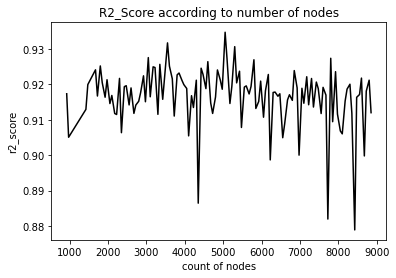

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))

%matplotlib inline

list_r2_score = sorted(r2_score.items())
x1, y1 = zip(*list_r2_score)

plt.plot(x1, y1,'black')
plt.title('R2_Score according to number of nodes')
plt.xlabel('count of nodes')
plt.ylabel('r2_score')
plt.show()

In [40]:
list_cov_dict_2 = cov_dict_2.items()
a, b = zip(*list_cov_dict_2)

a_sum = []

for i in range(0,len(a)):
    a_sum.append(sum(a[i]))

In [41]:
cov = dict(zip(a_sum,b))

cov

{925: 0.1103645803879458,
 1425: 0.10964626819322304,
 1925: 0.11823034296739876,
 2425: 0.11179384701647019,
 2925: 0.10736453407088696,
 3425: 0.11190067452372357,
 3925: 0.11014828165588042,
 4425: 0.10509504791881553,
 4925: 0.10803521857972086,
 5425: 0.1037378488384811,
 1675: 0.09968944475577891,
 2175: 0.11594593391527983,
 2675: 0.1113486843687737,
 3175: 0.10704184696599134,
 3675: 0.09870628100385154,
 4175: 0.10940338242725653,
 4675: 0.11127371187080033,
 5175: 0.10848852122486805,
 5675: 0.10376465799362992,
 5925: 0.10537061662421625,
 6175: 0.10538743891615995,
 6425: 0.1059942897667192,
 6675: 0.11772078711879372,
 6925: 0.10680464827049299,
 7175: 0.10008353590767595,
 7425: 0.10707504252630075,
 7675: 0.10620813340278139,
 1800: 0.1002165967202081,
 2300: 0.11228210092447592,
 2800: 0.11995826594445438,
 3300: 0.12538376680174143,
 3800: 0.10431515708264731,
 4300: 0.10132615419515949,
 4800: 0.11072963304513082,
 5300: 0.095826571710095,
 5800: 0.10134667107037519,


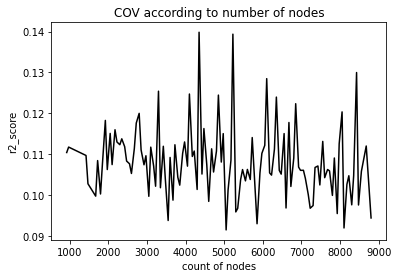

In [42]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))

%matplotlib inline

list_cov = sorted(cov.items())
a1, b1 = zip(*list_cov)

plt.plot(a1, b1,'black')
plt.title('COV according to number of nodes')
plt.xlabel('count of nodes')
plt.ylabel('r2_score')
plt.show()